In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# import os
# dataset_path = '/content/drive/MyDrive/dental-dataset'

# # Check if the dataset path exists
# if not os.path.exists(dataset_path):
#   print(f"Error: Dataset path '{dataset_path}' does not exist.")
# else:
#   class_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

#   if len(class_folders) != 2 :
#     print(f"Error: Expected 2 class folders inside '{dataset_path}', found {len(class_folders)}")
#   else:
#     print("Dataset classes found:")
#     for class_folder in class_folders:
#       class_path = os.path.join(dataset_path, class_folder)
#       image_count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
#       print(f"- {class_folder}: {image_count} images")

Dataset classes found:
- Non-extractable: 259 images
- Extractable: 251 images


In [ ]:

# import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow

# def preprocess_image(image_path):
#   img = cv2.imread(image_path)
#   if img is None:
#     print(f"Error: Could not read image at {image_path}")
#     return None

#   # Resize
#   img = cv2.resize(img, (224, 224))

#   # Normalize pixel values
#   img = img / 255.0

#   return img

# # Example usage (assuming you have a 'preprocessed_images' folder in your drive)
# preprocessed_dataset_path = '/content/drive/MyDrive/preprocessed_dental-dataset'

# if not os.path.exists(preprocessed_dataset_path):
#     os.makedirs(preprocessed_dataset_path)

# for class_folder in class_folders:
#     class_path = os.path.join(dataset_path, class_folder)
#     preprocessed_class_path = os.path.join(preprocessed_dataset_path, class_folder)

#     if not os.path.exists(preprocessed_class_path):
#         os.makedirs(preprocessed_class_path)

#     for image_file in os.listdir(class_path):
#         image_path = os.path.join(class_path, image_file)

#         if os.path.isfile(image_path):
#             preprocessed_image = preprocess_image(image_path)
#             if preprocessed_image is not None:
#                 preprocessed_image_path = os.path.join(preprocessed_class_path, image_file)
#                 cv2.imwrite(preprocessed_image_path, (preprocessed_image * 255).astype(np.uint8))

In [ ]:

# import os
# import random
# import shutil

# # Define paths
# preprocessed_dataset_path = '/content/drive/MyDrive/preprocessed_dental-dataset'
# train_path = '/content/drive/MyDrive/train'
# test_path = '/content/drive/MyDrive/test'


# # Create train and test directories if they don't exist
# for directory in [train_path, test_path]:
#     if not os.path.exists(directory):
#         os.makedirs(directory)
#     for class_folder in class_folders:
#       class_dir = os.path.join(directory, class_folder)
#       if not os.path.exists(class_dir):
#         os.makedirs(class_dir)


# # Iterate through each class folder
# for class_folder in class_folders:
#     class_image_path = os.path.join(preprocessed_dataset_path, class_folder)
#     images = [f for f in os.listdir(class_image_path) if os.path.isfile(os.path.join(class_image_path, f))]

#     # Shuffle images randomly
#     random.shuffle(images)

#     # Calculate split index
#     split_index = int(0.8 * len(images))

#     # Split images into train and test sets
#     train_images = images[:split_index]
#     test_images = images[split_index:]

#     # Copy images to respective train and test directories
#     for image in train_images:
#         source_path = os.path.join(class_image_path, image)
#         destination_path = os.path.join(train_path, class_folder, image)
#         shutil.copy(source_path, destination_path)

#     for image in test_images:
#         source_path = os.path.join(class_image_path, image)
#         destination_path = os.path.join(test_path, class_folder, image)
#         shutil.copy(source_path, destination_path)

# Augment

In [ ]:
# import os
# import cv2
# import numpy as np
# from torchvision import transforms
# from torchvision.utils import save_image
# from PIL import Image

# # Define paths
# preprocessed_dataset_path = '/content/drive/MyDrive/augmented'
# train_path = '/content/drive/MyDrive/train'
# test_path = '/content/drive/MyDrive/test'

# # Ensure output directories exist
# os.makedirs(preprocessed_dataset_path, exist_ok=True)
# for class_folder in ['Extractable', 'Non-extractable']:
#     os.makedirs(os.path.join(preprocessed_dataset_path, class_folder), exist_ok=True)

# # Define augmentation transforms
# augment_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(20),
#     transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
#     transforms.ToTensor()
# ])

# # Function to load images from a directory
# def load_images_from_folder(folder):
#     images = []
#     for filename in os.listdir(folder):
#         img_path = os.path.join(folder, filename)
#         img = Image.open(img_path).convert('RGB')
#         if img is not None:
#             images.append(img)
#     return images

# # Function to save augmented images
# def save_augmented_images(class_images, class_name, num_images):
#     save_path = os.path.join(preprocessed_dataset_path, class_name)
#     count = 0
#     while count < num_images:
#         for img in class_images:
#             augmented_img = augment_transform(img)
#             save_image(augmented_img, os.path.join(save_path, f'{class_name}_{count}.png'))
#             count += 1
#             if count >= num_images:
#                 break

# # Load and augment images for each class
# for class_name in ['Extractable', 'Non-extractable']:
#     class_folder = os.path.join(train_path, class_name)
#     class_images = load_images_from_folder(class_folder)
#     save_augmented_images(class_images, class_name, 1000)

# print("Data augmentation complete!")


Data augmentation complete!


# Cropless Augmentation

In [ ]:
import os
from torchvision import transforms
from torchvision.utils import save_image
from PIL import Image

# Define paths
augmented_cropless_path = '/content/drive/MyDrive/augmented_cropless'
train_path = '/content/drive/MyDrive/train'

# Ensure output directories exist
os.makedirs(augmented_cropless_path, exist_ok=True)
for class_folder in ['Extractable', 'Non-extractable']:
    os.makedirs(os.path.join(augmented_cropless_path, class_folder), exist_ok=True)

# Define cropless augmentation transforms
augment_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10),
    transforms.ToTensor()
])

# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).convert('RGB')
        if img is not None:
            images.append(img)
    return images

# Function to save augmented images
def save_augmented_images(class_images, class_name, num_images):
    save_path = os.path.join(augmented_cropless_path, class_name)
    count = 0
    while count < num_images:
        for img in class_images:
            augmented_img = augment_transform(img)
            save_image(augmented_img, os.path.join(save_path, f'{class_name}_{count}.png'))
            count += 1
            if count >= num_images:
                break

# Load and augment images for each class
for class_name in ['Extractable', 'Non-extractable']:
    class_folder = os.path.join(train_path, class_name)
    class_images = load_images_from_folder(class_folder)
    save_augmented_images(class_images, class_name, 600)

print("Cropless data augmentation complete!")


Cropless data augmentation complete!


# Resnet 50

Found 2000 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 348s 5s/step - accuracy: 0.4955 - loss: 0.9142
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 172ms/step - accuracy: 0.5178 - loss: 0.7232
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.4993 - loss: 0.6977
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.5230 - loss: 0.7178
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - accuracy: 0.5243 - loss: 0.7041
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.5202 - loss: 0.6982
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 168ms/step - accuracy: 0.5402 - loss: 0.6962
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - accuracy: 0.5366 - loss: 0.6883
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - accuracy: 0.5148 - loss: 0.6890
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - accuracy: 0.5199 - loss: 0.6963
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.5639 - loss: 0.6941
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 167ms/step 

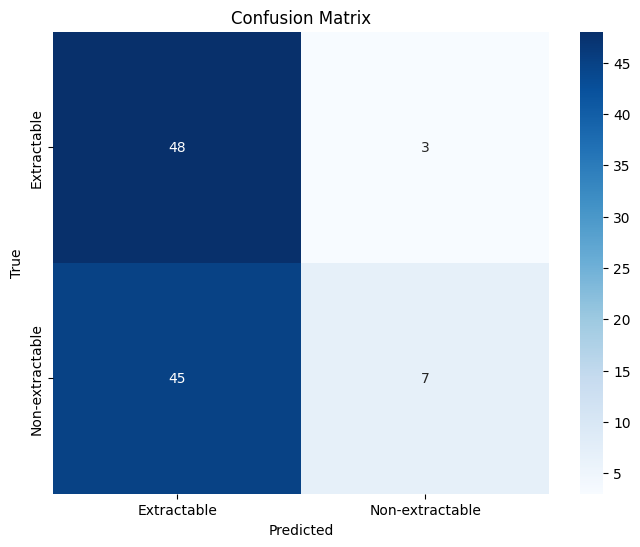

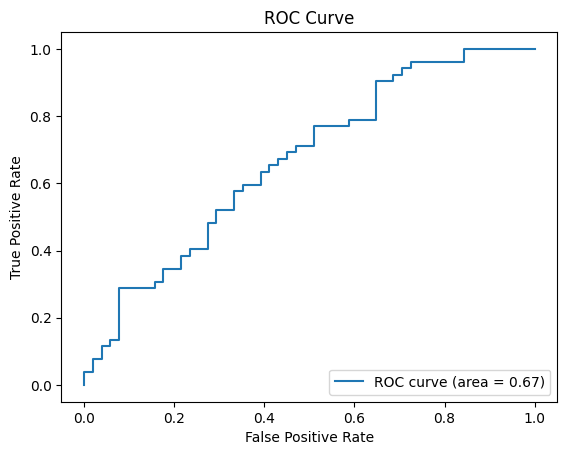

Accuracy: 0.5339805825242718
Precision: 0.7
Recall: 0.1346153846153846
F1-Score: 0.22580645161290322
ROC AUC: 0.6659125188536953


In [ ]:
!pip install tensorflow
!pip install scikit-learn

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # or 'categorical' if more than two classes
)

# Data rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary', # or 'categorical' if more than two classes
    shuffle=False # Important for ROC curve
)

# Load pre-trained ResNet50 model (excluding top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # or softmax for multi-class

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the base model (optional, but often improves performance)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # or categorical_crossentropy

# Train the model
model.fit(train_generator, epochs=30) # Adjust epochs as needed

# Make predictions on test set
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_prob)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# Resnet 101 v2
## from paper

Found 103 images belonging to 2 classes.

Testing with batch size: 3
Found 1200 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.6371 - loss: 0.9331 - val_accuracy: 0.7573 - val_loss: 0.4606
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.7825 - loss: 0.4293 - val_accuracy: 0.8058 - val_loss: 0.3970
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8434 - loss: 0.3354 - val_accuracy: 0.7087 - val_loss: 0.7258
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9066 - loss: 0.2472 - val_accuracy: 0.8058 - val_loss: 0.5590
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8998 - loss: 0.2446 - val_accuracy: 0.7961 - val_loss: 0.4946


103/103 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step


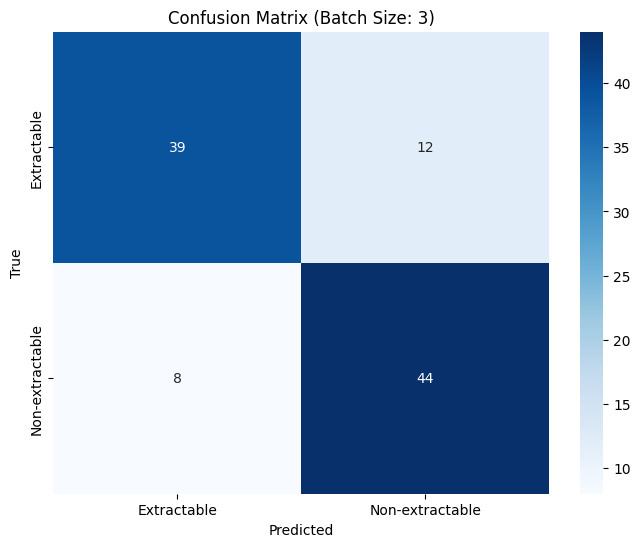

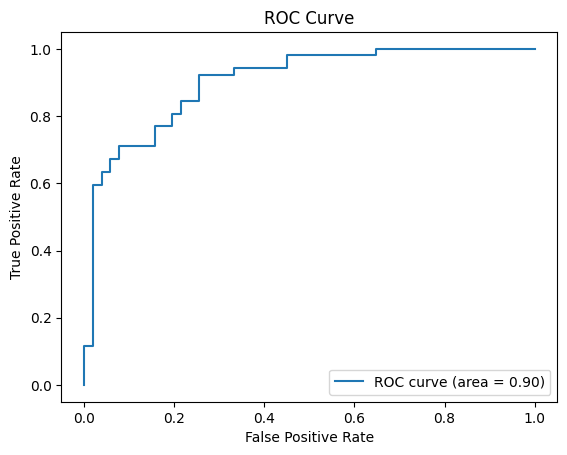

Accuracy: 0.8058252427184466
Precision: 0.7857142857142857
Recall: 0.8461538461538461
F1-Score: 0.8148148148148148
ROC AUC: 0.9030920060331825

Testing with batch size: 6
Found 1200 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - accuracy: 0.8560 - loss: 0.3336 - val_accuracy: 0.8350 - val_loss: 0.4379
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9198 - loss: 0.2285 - val_accuracy: 0.7864 - val_loss: 0.5437
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9390 - loss: 0.1678 - val_accuracy: 0.7961 - val_loss: 0.5169
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


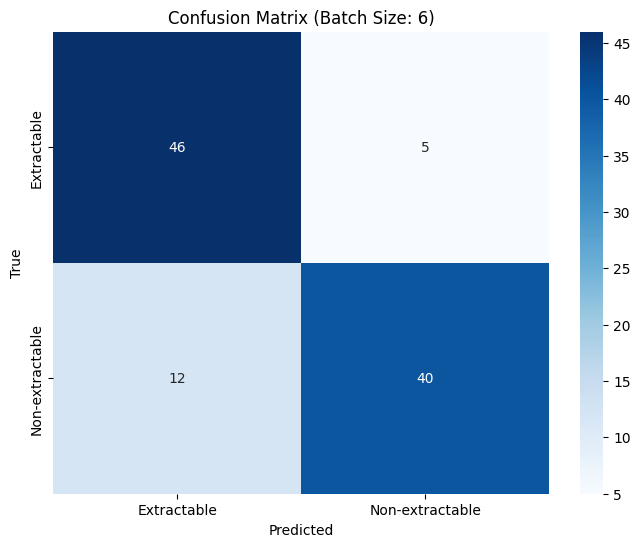

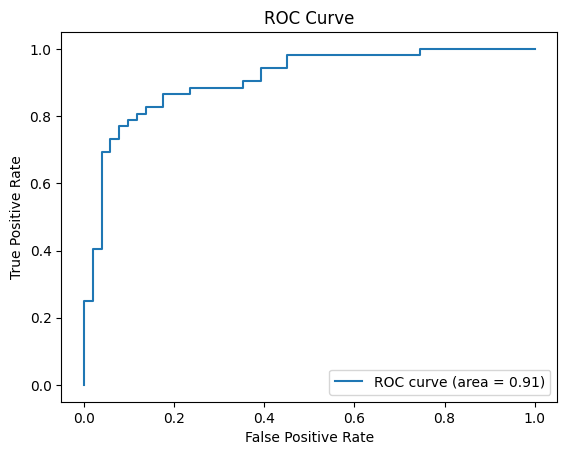

Accuracy: 0.8349514563106796
Precision: 0.8888888888888888
Recall: 0.7692307692307693
F1-Score: 0.8247422680412371
ROC AUC: 0.9087481146304676

Testing with batch size: 12
Found 1200 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.9023 - loss: 0.2513 - val_accuracy: 0.7476 - val_loss: 0.6189
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9425 - loss: 0.1642 - val_accuracy: 0.8155 - val_loss: 0.4397
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9660 - loss: 0.1148 - val_accuracy: 0.8058 - val_loss: 0.4840
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


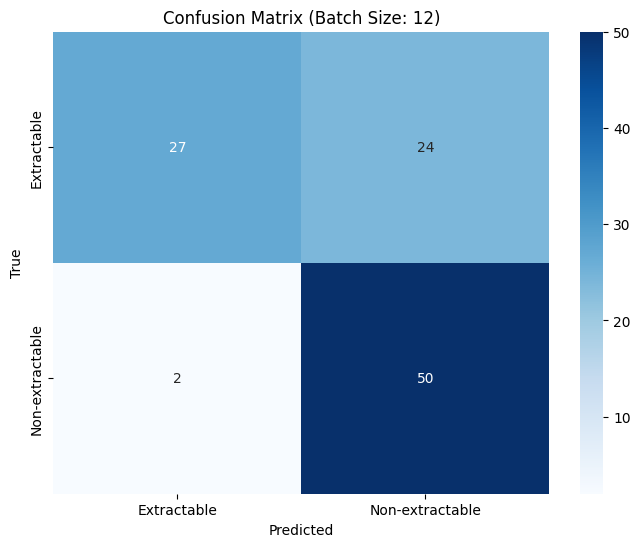

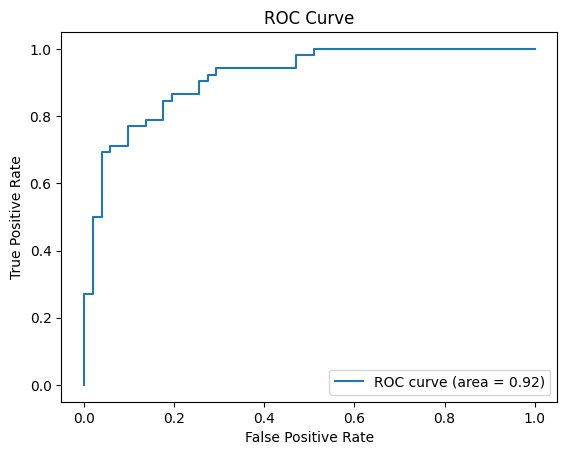

Accuracy: 0.7475728155339806
Precision: 0.6756756756756757
Recall: 0.9615384615384616
F1-Score: 0.7936507936507936
ROC AUC: 0.9159125188536954

Testing with batch size: 20
Found 1200 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.9422 - loss: 0.1630 - val_accuracy: 0.8058 - val_loss: 0.5421
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.9601 - loss: 0.1337 - val_accuracy: 0.8350 - val_loss: 0.4556
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.9799 - loss: 0.1004 - val_accuracy: 0.7670 - val_loss: 0.6312
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


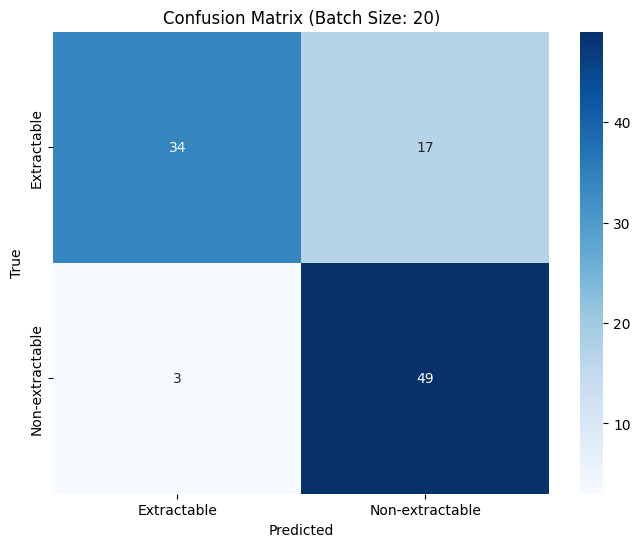

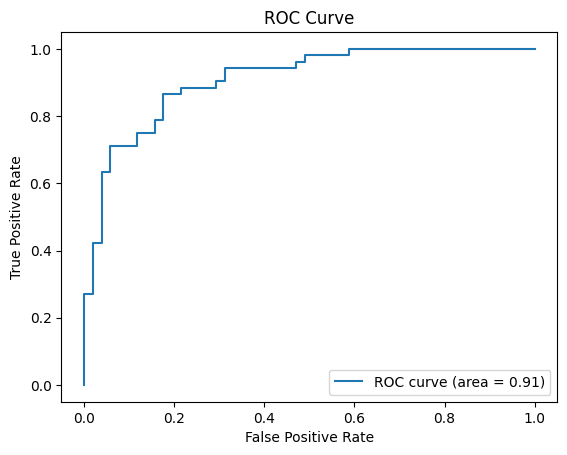

Accuracy: 0.8058252427184466
Precision: 0.7424242424242424
Recall: 0.9423076923076923
F1-Score: 0.8305084745762712
ROC AUC: 0.9083710407239819

Batch Size: 3
accuracy: 0.8058252427184466
precision: 0.7857142857142857
recall: 0.8461538461538461
f1: 0.8148148148148148
roc_auc: 0.9030920060331825

Batch Size: 6
accuracy: 0.8349514563106796
precision: 0.8888888888888888
recall: 0.7692307692307693
f1: 0.8247422680412371
roc_auc: 0.9087481146304676

Batch Size: 12
accuracy: 0.7475728155339806
precision: 0.6756756756756757
recall: 0.9615384615384616
f1: 0.7936507936507936
roc_auc: 0.9159125188536954

Batch Size: 20
accuracy: 0.8058252427184466
precision: 0.7424242424242424
recall: 0.9423076923076923
f1: 0.8305084745762712
roc_auc: 0.9083710407239819


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255)

# Data rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=1,  # Set to 1 to avoid issues with leftover samples
    class_mode='binary',
    shuffle=False
)

# Load pre-trained ResNet101V2 model
base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Batch sizes to test
batch_sizes = [3, 6, 12, 20]

# Store results for each batch size
results = {}

for batch_size in batch_sizes:
    print(f"\nTesting with batch size: {batch_size}")

    # Create training data generator
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary'
    )

    # Train the model
    history = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=30,
        callbacks=[early_stopping],
        verbose=1
    )

    # Predict on test set
    y_pred_prob = model.predict(test_generator)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Get true labels
    y_true = test_generator.classes

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Batch Size: {batch_size})')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    # Store metrics
    results[batch_size] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC AUC: {roc_auc}")

# Compare results
for batch_size, metrics in results.items():
    print(f"\nBatch Size: {batch_size}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


## Our baseline approach

Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 317ms/step - accuracy: 0.5794 - loss: 1.0825
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 0.8207 - loss: 0.4281
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.8837 - loss: 0.3177
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.9264 - loss: 0.2409
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.9268 - loss: 0.2084
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.9797 - loss: 0.1278
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.9752 - loss: 0.1101
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - accuracy: 0.9876 - loss: 0.0709
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.9943 - loss: 0.0612
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.9989 - loss: 0.0324
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.9997 - loss: 0.0219
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step -

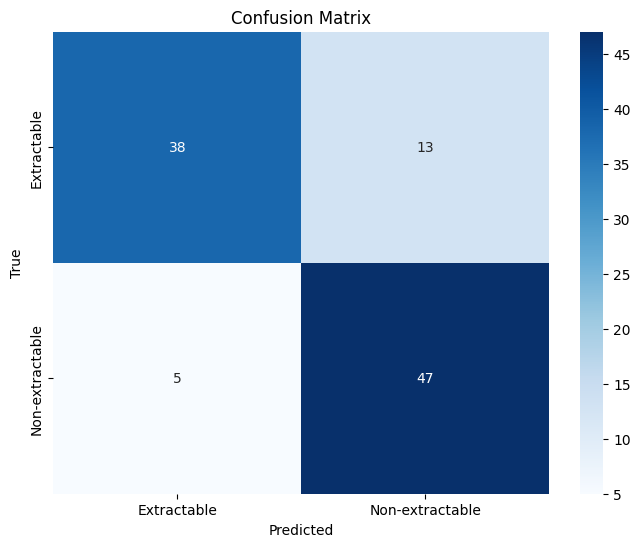

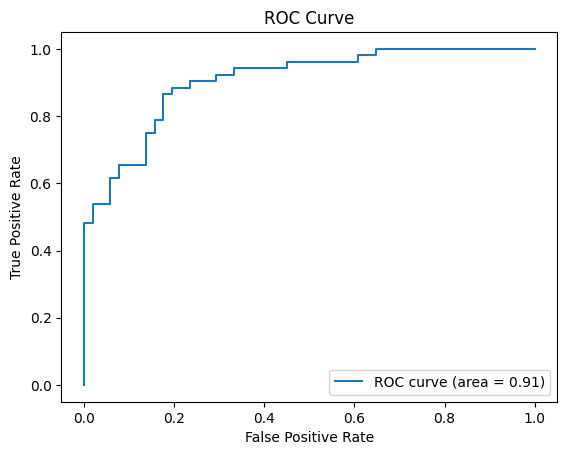

Accuracy: 0.8252427184466019
Precision: 0.7833333333333333
Recall: 0.9038461538461539
F1-Score: 0.8392857142857143
ROC AUC: 0.9053544494720965


In [ ]:
!pip install tensorflow
!pip install scikit-learn

import tensorflow as tf
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # or 'categorical' if more than two classes
)

# Data rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary', # or 'categorical' if more than two classes
    shuffle=False # Important for ROC curve
)

# Load pre-trained ResNet101V2 model (excluding top classification layer)
base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # or softmax for multi-class

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the base model (optional, but often improves performance)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # or categorical_crossentropy

# Train the model
model.fit(train_generator, epochs=30) # Adjust epochs as needed

# Make predictions on test set
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_prob)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# Retinanet

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 146MB/s]


Epoch 1/20, Train Loss: 0.6038, Val Loss: 0.4387
Epoch 2/20, Train Loss: 0.4517, Val Loss: 0.4107
Epoch 3/20, Train Loss: 0.3622, Val Loss: 0.3924
Epoch 4/20, Train Loss: 0.3042, Val Loss: 0.3871
Epoch 5/20, Train Loss: 0.3367, Val Loss: 0.3524
Epoch 6/20, Train Loss: 0.2797, Val Loss: 0.2944
Epoch 7/20, Train Loss: 0.2486, Val Loss: 0.3414
Epoch 8/20, Train Loss: 0.2507, Val Loss: 0.3567
Epoch 9/20, Train Loss: 0.2614, Val Loss: 0.4165
Early stopping triggered.


<ipython-input-4-3e9ae1380c1c>:127: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


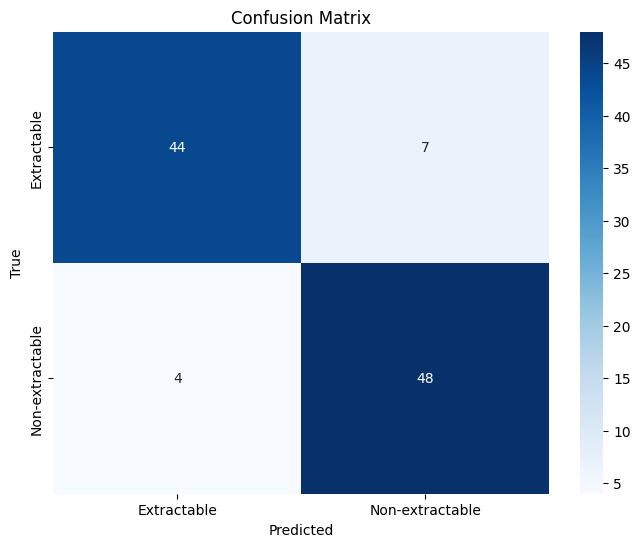

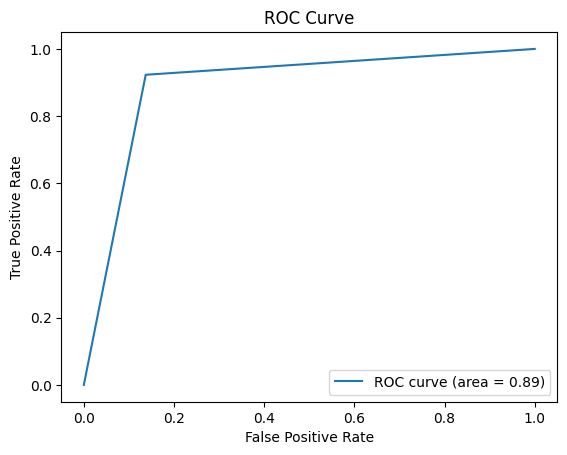

Accuracy: 0.8932038834951457
Precision: 0.8944836716681376
Recall: 0.8932038834951457
F1-Score: 0.8930829023379608
ROC AUC: 0.8929110105580694


In [ ]:
import os
import cv2
import numpy as np
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
class_folders = ['Extractable', 'Non-extractable']  # Replace with actual class folder names

# Custom Dataset class for classification
class CustomDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.images = []
        self.labels = []
        for class_folder in class_folders:
            class_path = os.path.join(root, class_folder)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.images.append(img_path)
                self.labels.append(class_folders.index(class_folder))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)
        if self.transform:
            img = self.transform(img)
        label = self.labels[idx]
        return img, label

# Data Transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets and dataloaders
batch_size = 3
train_dataset = CustomDataset(train_path, transform=data_transform)
test_dataset = CustomDataset(test_path, transform=data_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load a pre-trained ResNet model
model = models.resnet50(pretrained=True)
num_classes = len(class_folders)
in_features = model.fc.in_features
model.fc = torch.nn.Linear(in_features, num_classes)

# Move model to the right device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define optimizer and loss function
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)

# Early stopping parameters
early_stop_patience = 3
best_loss = float('inf')
epochs_no_improve = 0

# Training loop
num_epochs = 20  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Calculate average training loss
    train_loss /= len(train_loader)

    # Validation loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(test_loader)
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= early_stop_patience:
            print("Early stopping triggered.")
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Testing loop
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
roc_auc = roc_auc_score(all_labels, all_preds)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_folders, yticklabels=class_folders)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_preds)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


## Our Approach

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 141MB/s]


Epoch 1/10, Loss: 0.33023539185523987
Epoch 2/10, Loss: 0.22055113315582275
Epoch 3/10, Loss: 0.07753776013851166
Epoch 4/10, Loss: 0.007347108330577612
Epoch 5/10, Loss: 0.20456376671791077
Epoch 6/10, Loss: 0.020432453602552414
Epoch 7/10, Loss: 0.0018896573456004262
Epoch 8/10, Loss: 0.0004603246343322098
Epoch 9/10, Loss: 0.2206387221813202
Epoch 10/10, Loss: 0.0003016492701135576


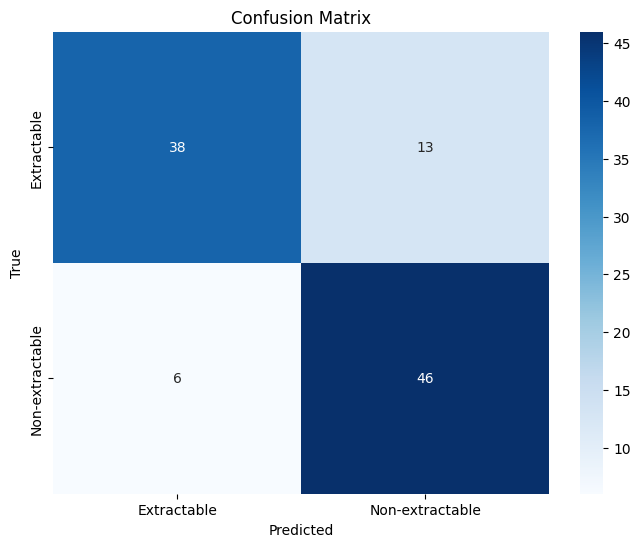

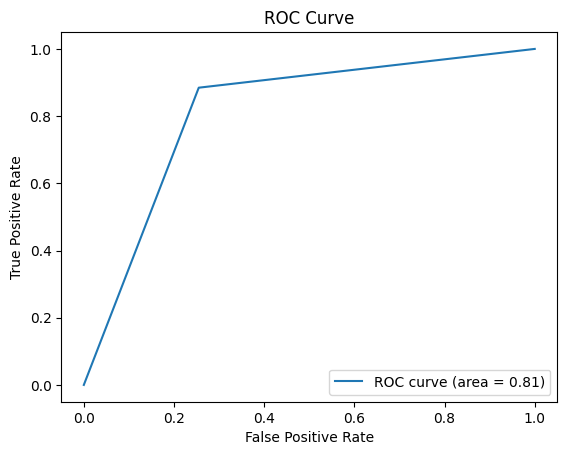

Accuracy: 0.8155339805825242
Precision: 0.8212410429787425
Recall: 0.8155339805825242
F1-Score: 0.8145543601854282
ROC AUC: 0.8148567119155354


In [ ]:
!pip install torch
!pip install torchvision
!pip install scikit-learn
!pip install opencv-python
!pip install seaborn

import os
import cv2
import numpy as np
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
class_folders = ['Extractable', 'Non-extractable']  # Replace with actual class folder names

# Custom Dataset class for classification
class CustomDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.images = []
        self.labels = []
        for class_folder in class_folders:
            class_path = os.path.join(root, class_folder)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.images.append(img_path)
                self.labels.append(class_folders.index(class_folder))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)
        if self.transform:
            img = self.transform(img)
        label = self.labels[idx]
        return img, label

# Data Transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets and dataloaders
train_dataset = CustomDataset(train_path, transform=data_transform)
test_dataset = CustomDataset(test_path, transform=data_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load a pre-trained ResNet model
model = models.resnet50(pretrained=True)
num_classes = len(class_folders)
in_features = model.fc.in_features
model.fc = torch.nn.Linear(in_features, num_classes)

# Move model to the right device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define optimizer and loss function
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Training loop
num_epochs = 10  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Testing loop
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
roc_auc = roc_auc_score(all_labels, all_preds)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_folders, yticklabels=class_folders)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_preds)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# Vision Transformer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Epoch 1/30, Loss: 0.6965286731719971
Epoch 2/30, Loss: 0.6901832222938538
Epoch 3/30, Loss: 1.1093335151672363
Epoch 4/30, Loss: 0.6940845251083374
Epoch 5/30, Loss: 0.5441777110099792
Epoch 6/30, Loss: 0.6734947562217712
Epoch 7/30, Loss: 0.6937911510467529
Epoch 8/30, Loss: 0.6942346096038818
Epoch 9/30, Loss: 0.6932487487792969
Epoch 10/30, Loss: 0.70830899477005
Epoch 11/30, Loss: 0.6717234253883362
Epoch 12/30, Loss: 0.7388111352920532
Epoch 13/30, Loss: 0.7053089737892151
Epoch 14/30, Loss: 0.6362716555595398
Epoch 15/30, Loss: 0.6935993432998657
Epoch 16/30, Loss: 0.6975147724151611
Epoch 17/30, Loss: 0.6986675262451172
Epoch 18/30, Loss: 0.8867753744125366
Epoch 19/30, Loss: 0.6722620725631714
Epoch 20/30, Loss: 0.6933944225311279
Epoch 21/30, Loss: 0.7988483905792236
Epoch 22/30, Loss: 0.6956121325492859
Epoch 23/30, Loss: 0.6930471658706665
Epoch 24/30, Loss: 0.6945900321006775
Epoch 25/30, Loss: 0.7061100006103516
Epoch 26/30, Loss: 0.678033709526062
Epoch 27/30, Loss: 0.704

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


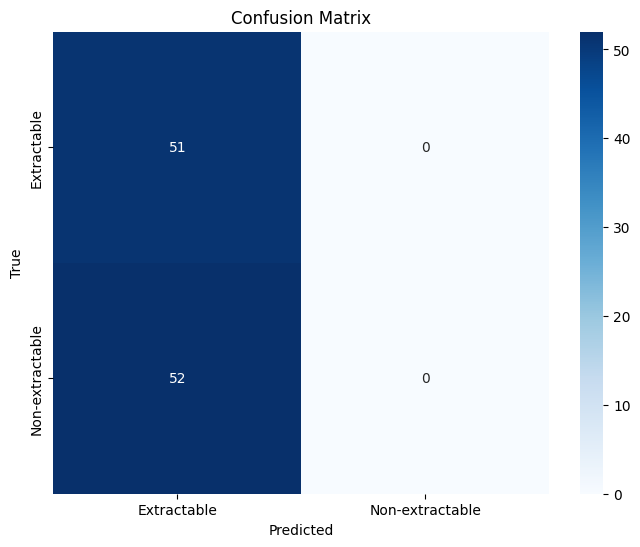

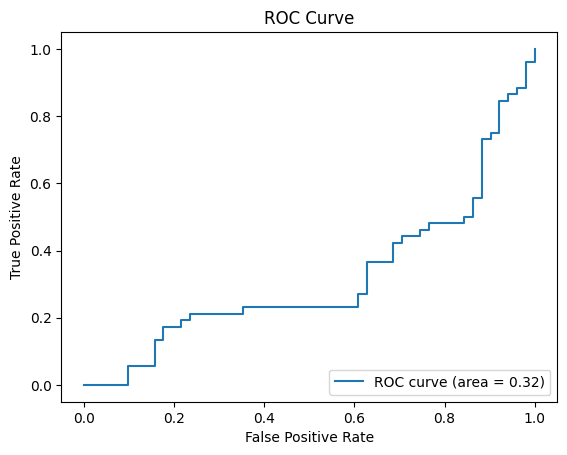

Accuracy: 0.49514563106796117
Precision: 0.2451691959656895
Recall: 0.49514563106796117
F1-Score: 0.32795359979826
ROC AUC: 0.3190045248868778


In [ ]:
!pip install torch
!pip install timm
!pip install torchvision
!pip install scikit-learn

import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import timm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'

# Data transformations (assuming no further preprocessing is needed)
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_path, transform=data_transform)
test_dataset = datasets.ImageFolder(test_path, transform=data_transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# Load Vision Transformer model
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=len(train_dataset.classes))

# Move model to the right device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 30  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Testing loop
model.eval()
all_preds = []
all_labels = []
all_pred_probs = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_pred_probs.extend(torch.nn.functional.softmax(outputs, dim=1)[:, 1].cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
roc_auc = roc_auc_score(all_labels, all_pred_probs)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_folders, yticklabels=class_folders)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_pred_probs)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# Simple CNN

Epoch 1/30, Loss: 0.6721411943435669
Epoch 2/30, Loss: 0.6120861172676086
Epoch 3/30, Loss: 0.6777963638305664
Epoch 4/30, Loss: 0.6063905358314514
Epoch 5/30, Loss: 0.39862260222435
Epoch 6/30, Loss: 0.29682859778404236
Epoch 7/30, Loss: 0.18291595578193665
Epoch 8/30, Loss: 0.059695955365896225
Epoch 9/30, Loss: 0.015372841618955135
Epoch 10/30, Loss: 0.0020576375536620617
Epoch 11/30, Loss: 0.0019627653528004885
Epoch 12/30, Loss: 0.00033603684278205037
Epoch 13/30, Loss: 0.0008729678811505437
Epoch 14/30, Loss: 0.0006234747706912458
Epoch 15/30, Loss: 0.00013447129458654672
Epoch 16/30, Loss: 0.0003323424025438726
Epoch 17/30, Loss: 6.245706754270941e-05
Epoch 18/30, Loss: 9.912869427353144e-05
Epoch 19/30, Loss: 5.630099622067064e-05
Epoch 20/30, Loss: 0.0001557211799081415
Epoch 21/30, Loss: 3.629703860497102e-05
Epoch 22/30, Loss: 2.7200849217479117e-05
Epoch 23/30, Loss: 1.4982787433837075e-05
Epoch 24/30, Loss: 1.5332800103351474e-05
Epoch 25/30, Loss: 1.0259203918394633e-05
E

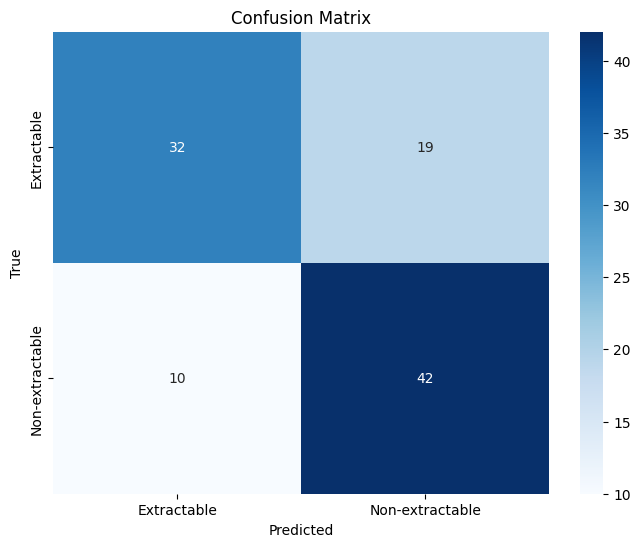

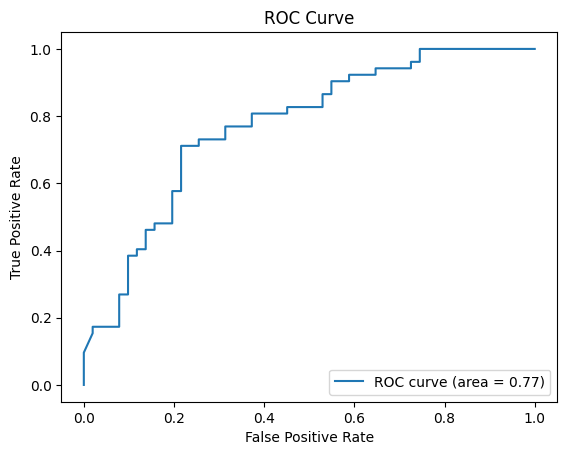

Accuracy: 0.7184466019417476
Precision: 0.7248584616084218
Recall: 0.7184466019417476
F1-Score: 0.7160353538852967
ROC AUC: 0.7713046757164405


In [ ]:
!pip install torch
!pip install torchvision
!pip install scikit-learn

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'

# Data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_path, transform=data_transform)
test_dataset = datasets.ImageFolder(test_path, transform=data_transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
num_classes = len(train_dataset.classes)
model = SimpleCNN(num_classes)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 30  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Testing loop
model.eval()
all_preds = []
all_labels = []
all_pred_probs = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_pred_probs.extend(torch.nn.functional.softmax(outputs, dim=1)[:, 1].cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
roc_auc = roc_auc_score(all_labels, all_pred_probs)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_folders, yticklabels=class_folders)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_pred_probs)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# VGG16

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 78.8MB/s]


Epoch 1/30, Loss: 0.7079991698265076
Epoch 2/30, Loss: 0.6638520956039429
Epoch 3/30, Loss: 0.6675569415092468
Epoch 4/30, Loss: 0.6979180574417114
Epoch 5/30, Loss: 0.7370389103889465
Epoch 6/30, Loss: 0.6792593002319336
Epoch 7/30, Loss: 0.7071576118469238
Epoch 8/30, Loss: 0.4746578633785248
Epoch 9/30, Loss: 0.603033721446991
Epoch 10/30, Loss: 0.6238112449645996
Epoch 11/30, Loss: 0.4733651876449585
Epoch 12/30, Loss: 0.5985020995140076
Epoch 13/30, Loss: 0.6858461499214172
Epoch 14/30, Loss: 0.6943631172180176
Epoch 15/30, Loss: 0.7072991132736206
Epoch 16/30, Loss: 0.6866794228553772
Epoch 17/30, Loss: 0.6937631368637085
Epoch 18/30, Loss: 0.7031655311584473
Epoch 19/30, Loss: 0.7111658453941345
Epoch 20/30, Loss: 0.6975618004798889
Epoch 21/30, Loss: 0.6985095143318176
Epoch 22/30, Loss: 0.6902343034744263
Epoch 23/30, Loss: 0.7199615240097046
Epoch 24/30, Loss: 0.6883595585823059
Epoch 25/30, Loss: 0.6914719939231873
Epoch 26/30, Loss: 0.687619149684906
Epoch 27/30, Loss: 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


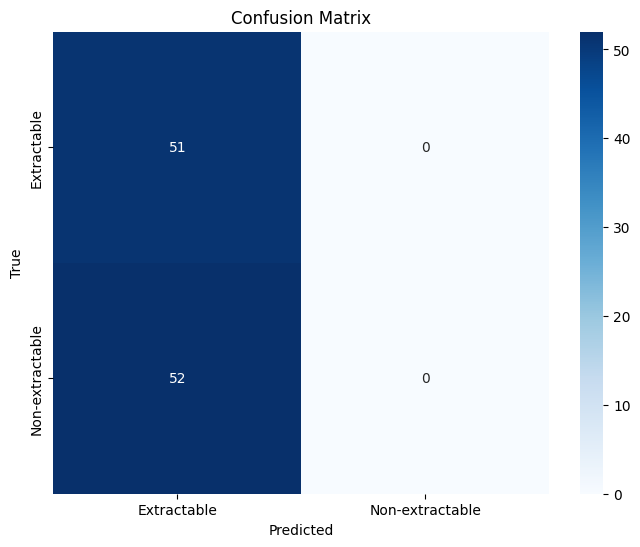

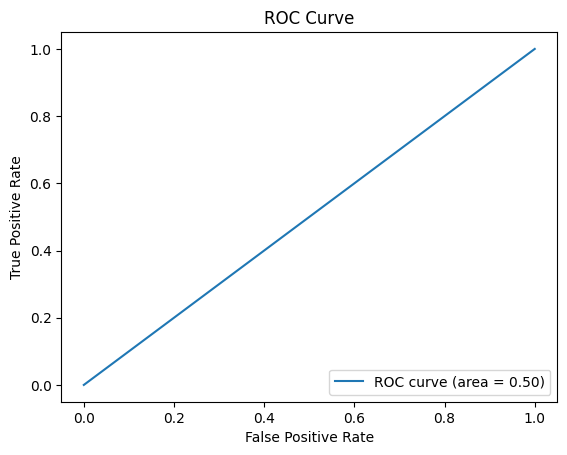

Accuracy: 0.49514563106796117
Precision: 0.2451691959656895
Recall: 0.49514563106796117
F1-Score: 0.32795359979826
ROC AUC: 0.5


In [ ]:
!pip install torch
!pip install torchvision
!pip install scikit-learn

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'

# Data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_path, transform=data_transform)
test_dataset = datasets.ImageFolder(test_path, transform=data_transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load VGG16 model
model = models.vgg16(pretrained=True)

# Modify the classifier to match the number of classes in your dataset
num_classes = len(train_dataset.classes)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

# Move model to the right device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Training loop
num_epochs = 30  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Testing loop
model.eval()
all_preds = []
all_labels = []
all_pred_probs = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_pred_probs.extend(torch.nn.functional.softmax(outputs, dim=1)[:, 1].cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
roc_auc = roc_auc_score(all_labels, all_pred_probs)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_folders, yticklabels=class_folders)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_pred_probs)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# CNN with attention

Epoch 1/30, Loss: 0.6897697448730469
Epoch 2/30, Loss: 0.6790788173675537
Epoch 3/30, Loss: 0.5570942759513855
Epoch 4/30, Loss: 0.67790687084198
Epoch 5/30, Loss: 0.682826578617096
Epoch 6/30, Loss: 0.4866858124732971
Epoch 7/30, Loss: 0.3976536989212036
Epoch 8/30, Loss: 0.08907938003540039
Epoch 9/30, Loss: 0.28363052010536194
Epoch 10/30, Loss: 0.06959663331508636
Epoch 11/30, Loss: 0.040081702172756195
Epoch 12/30, Loss: 0.03419099003076553
Epoch 13/30, Loss: 0.025144675746560097
Epoch 14/30, Loss: 0.004722787067294121
Epoch 15/30, Loss: 0.00856297742575407
Epoch 16/30, Loss: 0.00018084709881804883
Epoch 17/30, Loss: 0.001279667834751308
Epoch 18/30, Loss: 0.0017196564003825188
Epoch 19/30, Loss: 0.0010937787592411041
Epoch 20/30, Loss: 0.0002703618665691465
Epoch 21/30, Loss: 0.00048653653357177973
Epoch 22/30, Loss: 4.711967631010339e-05
Epoch 23/30, Loss: 2.169455365219619e-05
Epoch 24/30, Loss: 8.20662608020939e-05
Epoch 25/30, Loss: 6.415470852516592e-05
Epoch 26/30, Loss: 3.

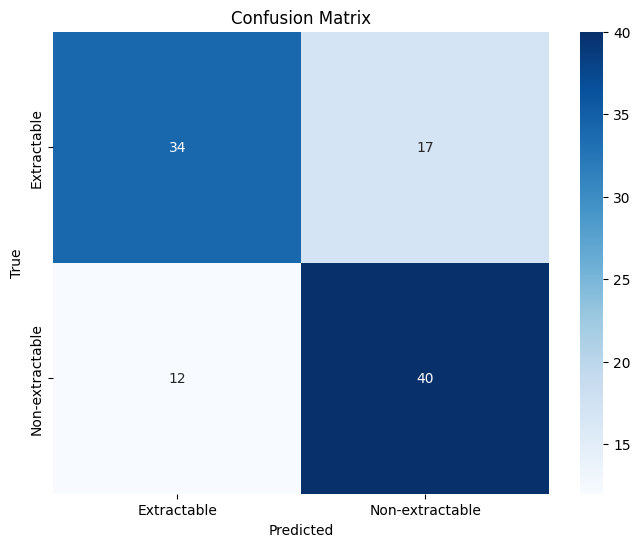

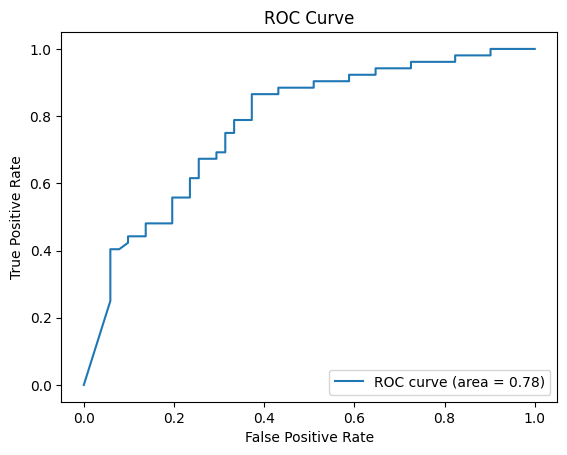

Accuracy: 0.7184466019417476
Precision: 0.7202609732435775
Recall: 0.7184466019417476
F1-Score: 0.7176477178084129
ROC AUC: 0.7771493212669683


In [ ]:
!pip install torch
!pip install torchvision
!pip install scikit-learn

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
torch.cuda.empty_cache()
# Paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'

# Data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_path, transform=data_transform)
test_dataset = datasets.ImageFolder(test_path, transform=data_transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a CNN model with attention mechanism
class AttentionCNN(nn.Module):
    def __init__(self, num_classes):
        super(AttentionCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.attention = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(64, 1, kernel_size=1)
        )
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))

        attn_weights = self.attention(x)
        attn_weights = nn.Sigmoid()(attn_weights)
        x = x * attn_weights

        x = x.view(-1, 128 * 28 * 28)
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
num_classes = len(train_dataset.classes)
model = AttentionCNN(num_classes)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0004)

# Training loop
num_epochs = 30  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Testing loop
model.eval()
all_preds = []
all_labels = []
all_pred_probs = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_pred_probs.extend(torch.nn.functional.softmax(outputs, dim=1)[:, 1].cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
roc_auc = roc_auc_score(all_labels, all_pred_probs)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_folders, yticklabels=class_folders)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_pred_probs)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# CNN-LSTM

Epoch 1/30, Loss: 0.6921679377555847
Epoch 2/30, Loss: 0.6942199468612671
Epoch 3/30, Loss: 0.697591245174408
Epoch 4/30, Loss: 0.7028418183326721
Epoch 5/30, Loss: 0.6919153928756714
Epoch 6/30, Loss: 0.6889439225196838
Epoch 7/30, Loss: 0.6892649531364441
Epoch 8/30, Loss: 0.6613462567329407
Epoch 9/30, Loss: 0.6580909490585327
Epoch 10/30, Loss: 0.6257067322731018
Epoch 11/30, Loss: 0.670775830745697
Epoch 12/30, Loss: 0.6579138040542603
Epoch 13/30, Loss: 0.6305577754974365
Epoch 14/30, Loss: 0.5137841701507568
Epoch 15/30, Loss: 0.519059956073761
Epoch 16/30, Loss: 0.6963114142417908
Epoch 17/30, Loss: 0.4180057942867279
Epoch 18/30, Loss: 0.3217257857322693
Epoch 19/30, Loss: 0.361571729183197
Epoch 20/30, Loss: 0.1257333755493164
Epoch 21/30, Loss: 0.3415207266807556
Epoch 22/30, Loss: 0.06441687047481537
Epoch 23/30, Loss: 0.18741831183433533
Epoch 24/30, Loss: 0.11908966302871704
Epoch 25/30, Loss: 0.0703263208270073
Epoch 26/30, Loss: 0.0973658561706543
Epoch 27/30, Loss: 0.0

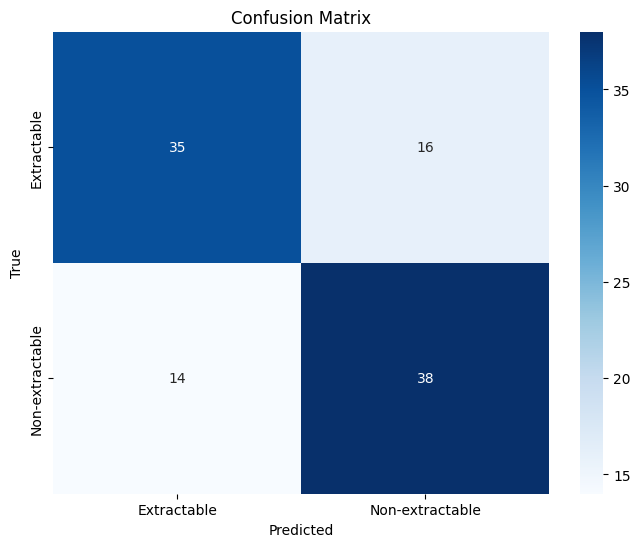

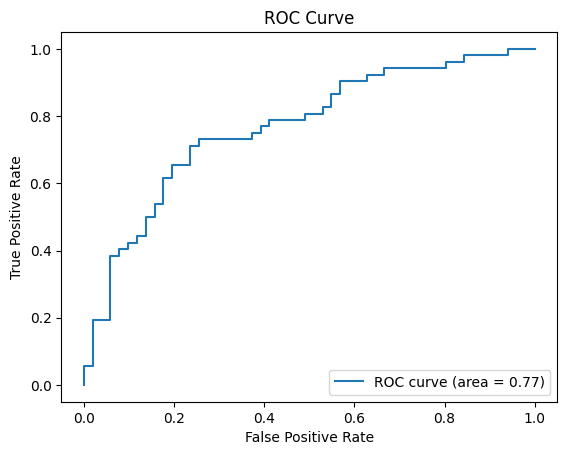

Accuracy: 0.7087378640776699
Precision: 0.7089433400113012
Recall: 0.7087378640776699
F1-Score: 0.7085729987177138
ROC AUC: 0.7669683257918551


In [ ]:
!pip install torch
!pip install torchvision
!pip install scikit-learn

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'

# Data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_path, transform=data_transform)
test_dataset = datasets.ImageFolder(test_path, transform=data_transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a CNN-LSTM model
class CNN_LSTM(nn.Module):
    def __init__(self, num_classes):
        super(CNN_LSTM, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.lstm = nn.LSTM(64 * 56 * 56, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        batch_size, timesteps, C, H, W = x.size()
        c_in = x.view(batch_size * timesteps, C, H, W)
        c_out = self.pool(nn.ReLU()(self.conv1(c_in)))
        c_out = self.pool(nn.ReLU()(self.conv2(c_out)))
        r_in = c_out.view(batch_size, timesteps, -1)
        r_out, (h_n, c_n) = self.lstm(r_in)
        r_out2 = self.fc(r_out[:, -1, :])
        return r_out2

# Initialize model, loss function, and optimizer
num_classes = len(train_dataset.classes)
model = CNN_LSTM(num_classes)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Training loop
num_epochs = 30  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.unsqueeze(1)  # Add a dummy sequence dimension
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Testing loop
model.eval()
all_preds = []
all_labels = []
all_pred_probs = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.unsqueeze(1)  # Add a dummy sequence dimension
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_pred_probs.extend(torch.nn.functional.softmax(outputs, dim=1)[:, 1].cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
roc_auc = roc_auc_score(all_labels, all_pred_probs)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_folders, yticklabels=class_folders)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_pred_probs)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# Custom CNN

1. **Input Layer**: This layer takes an input image of size 224x224 pixels with 3 color channels (RGB).

2. **Conv Layer 1**: This layer applies 32 filters of size 3x3 to the input image, producing an output of size 224x224x32. This is followed by a ReLU activation and max pooling, reducing the output size to 112x112x32.

3. **Conv Layer 2**: This layer applies 64 filters of size 3x3 to the output of the first pooling layer, producing an output of size 112x112x64. This is followed by a ReLU activation and max pooling, reducing the output size to 56x56x64.

4. **Conv Layer 3**: This layer applies 128 filters of size 3x3 to the output of the second pooling layer, producing an output of size 56x56x128. This is followed by a ReLU activation and max pooling, reducing the output size to 28x28x128.

5. **Flatten Layer**: This layer flattens the 3D output of the third pooling layer into a 1D vector of size 100352 (128X28X28).

6. **Fully Connected Layer 1**: This layer applies a linear transformation to the flattened vector, producing an output of size 512, followed by a ReLU activation.

7. **Fully Connected Layer 2**: This layer applies a final linear transformation, producing an output of size equal to the number of classes in your dataset.



Epoch 1/30, Loss: 0.691743791103363
Epoch 2/30, Loss: 0.668691873550415
Epoch 3/30, Loss: 0.7269944548606873
Epoch 4/30, Loss: 0.5271834135055542
Epoch 5/30, Loss: 0.5891626477241516
Epoch 6/30, Loss: 0.32329535484313965
Epoch 7/30, Loss: 0.4525502324104309
Epoch 8/30, Loss: 0.14275674521923065
Epoch 9/30, Loss: 0.03656386956572533
Epoch 10/30, Loss: 0.023967312648892403
Epoch 11/30, Loss: 0.016688019037246704
Epoch 12/30, Loss: 0.022838221862912178
Epoch 13/30, Loss: 0.004477372858673334
Epoch 14/30, Loss: 1.9788074496318586e-05
Epoch 15/30, Loss: 0.0009478394058533013
Epoch 16/30, Loss: 0.00015828899631742388
Epoch 17/30, Loss: 0.00014808976266067475
Epoch 18/30, Loss: 0.0001966612908290699
Epoch 19/30, Loss: 7.579426164738834e-05
Epoch 20/30, Loss: 0.0001520416553830728
Epoch 21/30, Loss: 0.00024894659873098135
Epoch 22/30, Loss: 5.712944766855799e-05
Epoch 23/30, Loss: 0.00012419838458299637
Epoch 24/30, Loss: 8.357026672456414e-05
Epoch 25/30, Loss: 0.00011711965635186061
Epoch 26

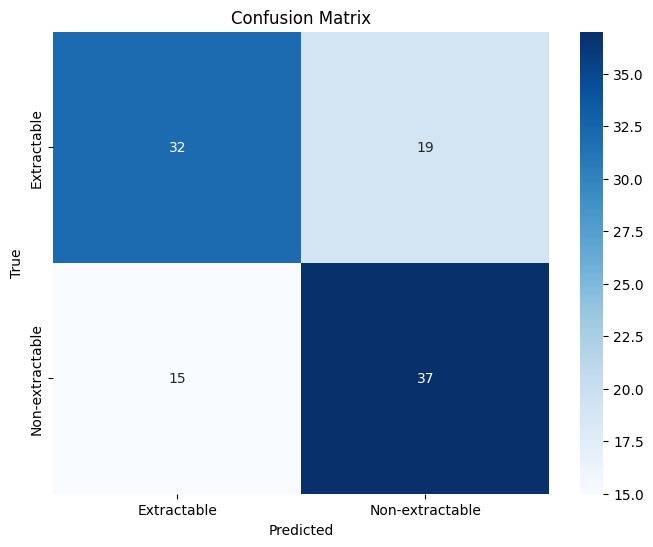

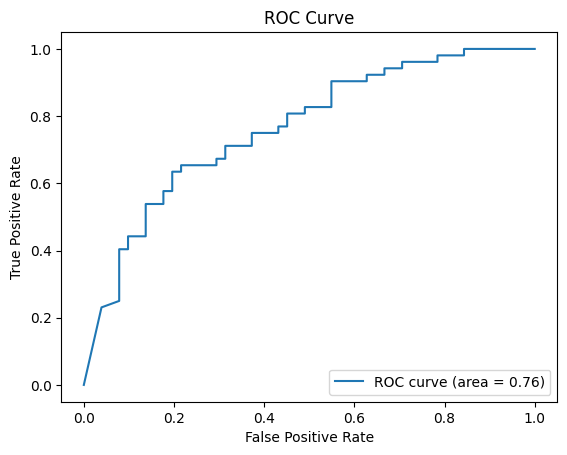

Accuracy: 0.6699029126213593
Precision: 0.6706849234219612
Recall: 0.6699029126213593
F1-Score: 0.6692791463942643
ROC AUC: 0.7639517345399698


In [ ]:
!pip install torch
!pip install torchvision
!pip install scikit-learn

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'

# Data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_path, transform=data_transform)
test_dataset = datasets.ImageFolder(test_path, transform=data_transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a custom CNN model
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
num_classes = len(train_dataset.classes)
model = CustomCNN(num_classes)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Training loop
num_epochs = 30  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Testing loop
model.eval()
all_preds = []
all_labels = []
all_pred_probs = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_pred_probs.extend(torch.nn.functional.softmax(outputs, dim=1)[:, 1].cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
roc_auc = roc_auc_score(all_labels, all_pred_probs)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_folders, yticklabels=class_folders)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_pred_probs)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


In [ ]:
import torch

# Delete variables
del model
del optimizer
del train_loader
del test_loader
del images
del labels
del outputs

# Clear cache
torch.cuda.empty_cache()
print("GPU memory cleared!")


GPU memory cleared!


# Resnet 152

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30, Loss: 0.73517245054245
Epoch 2/30, Loss: 0.7019610404968262
Epoch 3/30, Loss: 0.5342215895652771
Epoch 4/30, Loss: 0.8135054707527161
Epoch 5/30, Loss: 0.8232800960540771
Epoch 6/30, Loss: 0.6459383964538574
Epoch 7/30, Loss: 0.664155900478363
Epoch 8/30, Loss: 0.6092082858085632
Epoch 9/30, Loss: 0.41677239537239075
Epoch 10/30, Loss: 0.6421180367469788
Epoch 11/30, Loss: 0.365190714597702
Epoch 12/30, Loss: 0.3874950408935547
Epoch 13/30, Loss: 0.2637539207935333
Epoch 14/30, Loss: 0.3581809401512146
Epoch 15/30, Loss: 0.18889035284519196
Epoch 16/30, Loss: 0.2573719024658203
Epoch 17/30, Loss: 0.09312181919813156
Epoch 18/30, Loss: 0.23263095319271088
Epoch 19/30, Loss: 0.6132198572158813
Epoch 20/30, Loss: 0.3112804591655731
Epoch 21/30, Loss: 0.1121177226305008
Epoch 22/30, Loss: 0.17720291018486023
Epoch 23/30, Loss: 0.09072230011224747
Epoch 24/30, Loss: 0.0238522756844759
Epoch 25/30, Loss: 0.04413209855556488
Epoch 26/30, Loss: 0.012022451497614384
Epoch 27/30, Los

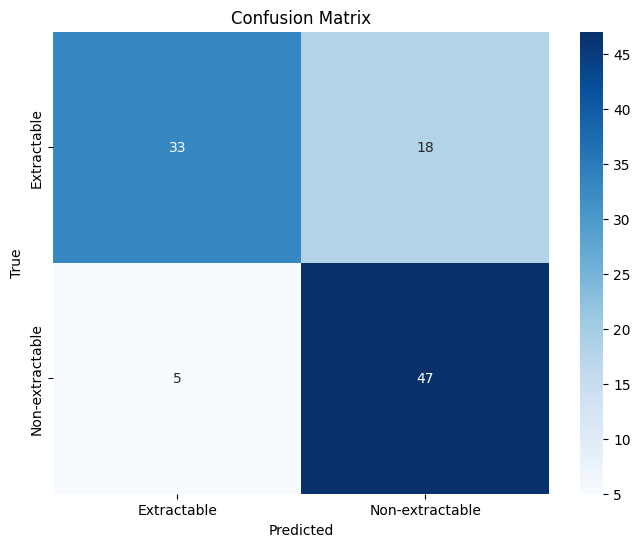

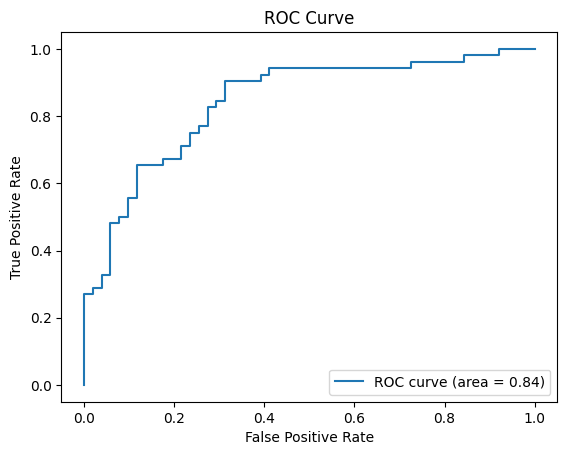

Accuracy: 0.7766990291262136
Precision: 0.7950434338272867
Recall: 0.7766990291262136
F1-Score: 0.7727961407463971
ROC AUC: 0.8420060331825038


In [ ]:
!pip install torch
!pip install torchvision
!pip install scikit-learn

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
class_folders = ['Extractable', 'Non-extractable']  # Replace with actual class folder names

# Data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_path, transform=data_transform)
test_dataset = datasets.ImageFolder(test_path, transform=data_transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load a pre-trained ResNet-152 model
model = models.resnet152(pretrained=True)
num_classes = len(train_dataset.classes)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

# Move model to the right device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 30  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Testing loop
model.eval()
all_preds = []
all_labels = []
all_pred_probs = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_pred_probs.extend(torch.nn.functional.softmax(outputs, dim=1)[:, 1].cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
roc_auc = roc_auc_score(all_labels, all_pred_probs)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_folders, yticklabels=class_folders)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_pred_probs)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# Cnn mobilenet v2

Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 241ms/step - accuracy: 0.6182 - loss: 0.8247
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.8410 - loss: 0.3714
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.8250 - loss: 0.3848
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.8627 - loss: 0.3163
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.9190 - loss: 0.2255
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.9111 - loss: 0.2143
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.9454 - loss: 0.1749
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.9651 - loss: 0.1196
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.9612 - loss: 0.1367
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.9803 - loss: 0.0865
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 0.9558 - loss: 0.1130
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accu

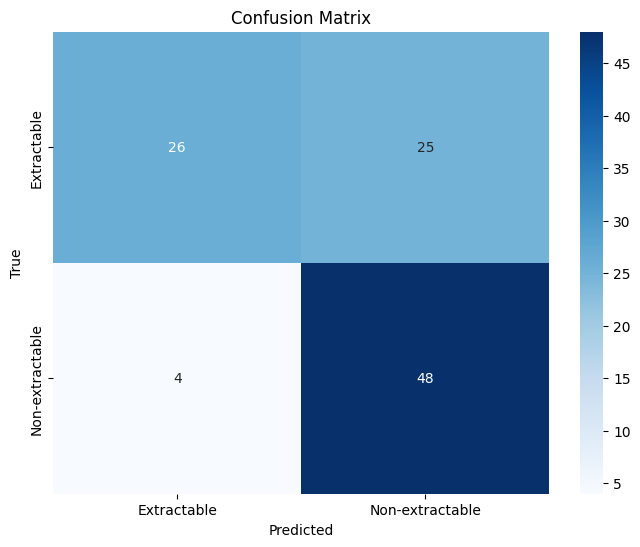

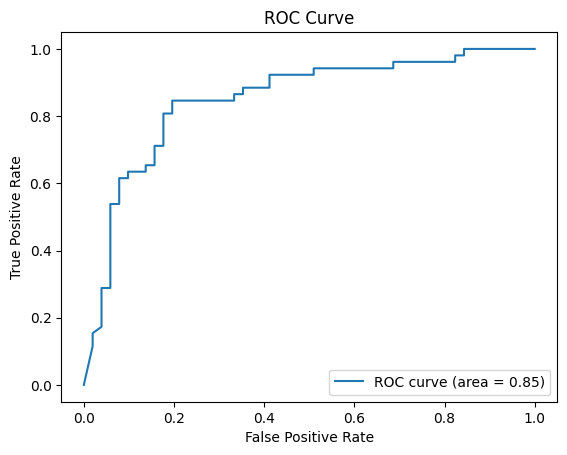

Accuracy: 0.7184466019417476
Precision: 0.6575342465753424
Recall: 0.9230769230769231
F1-Score: 0.768
ROC AUC: 0.8501131221719458


In [ ]:
!pip install tensorflow
!pip install scikit-learn

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # or 'categorical' if more than two classes
)

# Data rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary', # or 'categorical' if more than two classes
    shuffle=False # Important for ROC curve
)

# Load pre-trained MobileNetV2 model (excluding top classification layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # or softmax for multi-class

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the base model (optional, but often improves performance)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # or categorical_crossentropy

# Train the model
model.fit(train_generator, epochs=30) # Adjust epochs as needed

# Make predictions on test set
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_prob)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# Multi Axis Vision Transformer

Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 499ms/step - accuracy: 0.4690 - loss: 3.7347
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.4976 - loss: 1.1674
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.5377 - loss: 0.7706
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.4990 - loss: 0.7686
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.5031 - loss: 0.7609
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.4838 - loss: 0.8324
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.4930 - loss: 0.7255
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.5275 - loss: 0.7499
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.4944 - loss: 0.7120
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 203ms/step - accuracy: 0.5210 - loss: 0.7085
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.5332 - loss: 0.7147
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


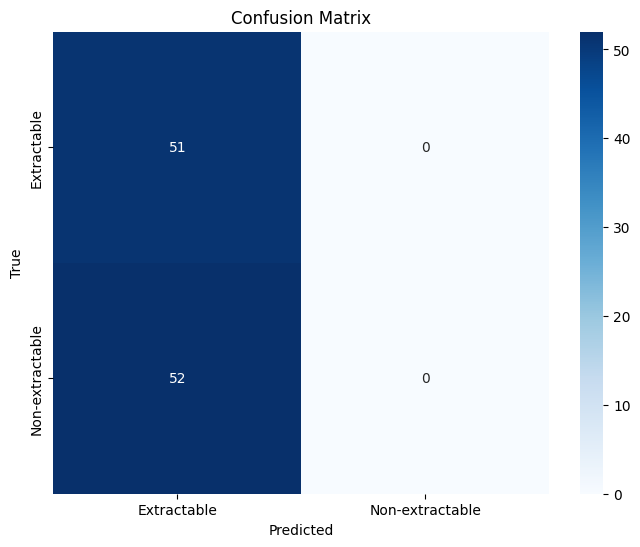

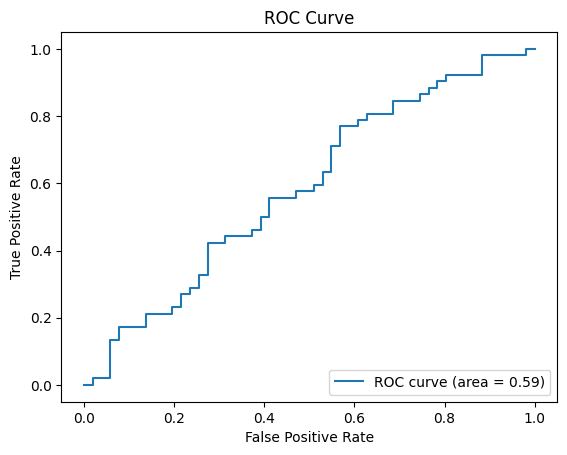

Accuracy: 0.49514563106796117
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5859728506787331


In [ ]:
!pip install tensorflow
!pip install scikit-learn

import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, LayerNormalization, MultiHeadAttention, Dropout, Add, Reshape, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # or 'categorical' if more than two classes
)

# Data rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary', # or 'categorical' if more than two classes
    shuffle=False # Important for ROC curve
)

# Custom layer to wrap TensorFlow function
class PatchExtractor(tf.keras.layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super(PatchExtractor, self).__init__(**kwargs)
        self.patch_size = patch_size

    def call(self, images):
        patches = tf.image.extract_patches(images=images,
                                           sizes=[1, self.patch_size, self.patch_size, 1],
                                           strides=[1, self.patch_size, self.patch_size, 1],
                                           rates=[1, 1, 1, 1],
                                           padding='SAME')
        patch_dim = patches.shape[-1]
        num_patches = patches.shape[1] * patches.shape[2]
        return tf.reshape(patches, (-1, num_patches, patch_dim))

# Define the Vision Transformer model
def vision_transformer_model(input_shape, num_classes, num_heads=8, mlp_dim=256, dropout_rate=0.1):
    inputs = Input(shape=input_shape)

    # Tokenization
    patches = PatchExtractor(patch_size=16)(inputs)
    patch_dim = patches.shape[-1]

    # Positional embedding
    position_embedding = Dense(patch_dim)(patches)

    # Multi-Axis Vision Transformer blocks
    for _ in range(4):  # Number of transformer layers
        # Layer normalization
        x1 = LayerNormalization()(position_embedding)
        # Multi-head attention
        attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=patch_dim // num_heads)(x1, x1)
        # Skip connection
        x2 = Add()([attention_output, position_embedding])
        # Layer normalization
        x3 = LayerNormalization()(x2)
        # MLP
        x3 = Dense(mlp_dim, activation='relu')(x3)
        x3 = Dropout(dropout_rate)(x3)
        x3 = Dense(patch_dim)(x3)
        # Skip connection
        position_embedding = Add()([x3, x2])

    x = Reshape((int(input_shape[0] / 16), int(input_shape[1] / 16), patch_dim))(position_embedding)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    outputs = Dense(num_classes, activation='sigmoid')(x)  # or softmax for multi-class

    model = Model(inputs, outputs)
    return model

# Create the model
model = vision_transformer_model(input_shape=(img_width, img_height, 3), num_classes=1)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # or categorical_crossentropy

# Train the model
model.fit(train_generator, epochs=30)  # Adjust epochs as needed

# Make predictions on test set
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_prob)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# CNN-HMC

Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


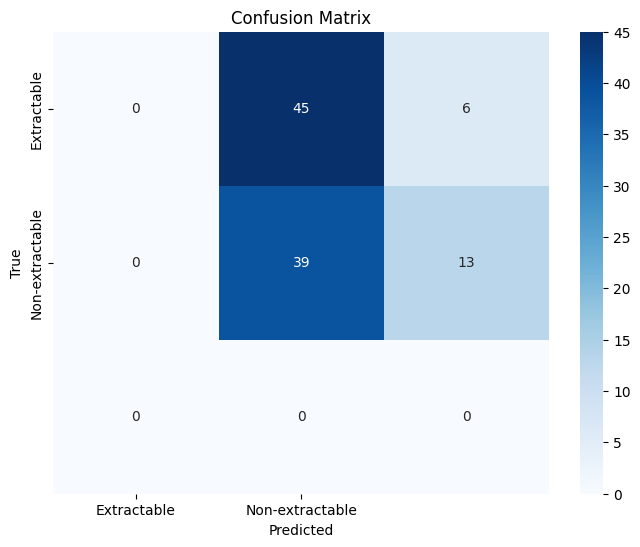

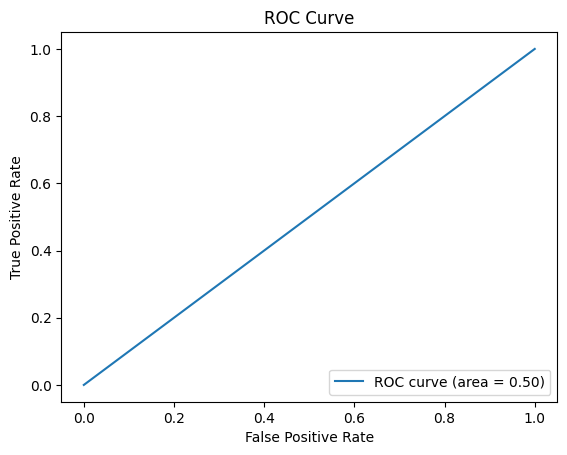

Accuracy: 0.3786407766990291
Precision: 0.23439667128987518
Recall: 0.3786407766990291
F1-Score: 0.289548829240434
ROC AUC: 0.5


In [ ]:
!pip install tensorflow
!pip install scikit-learn
!pip install hmmlearn

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from hmmlearn import hmm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # or 'categorical' if more than two classes
)

# Data rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary', # or 'categorical' if more than two classes
    shuffle=False # Important for ROC curve
)

# Define the CNN model for feature extraction
def cnn_feature_extractor(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    model = Model(inputs, x)
    return model

# Create the CNN feature extractor model
cnn_model = cnn_feature_extractor(input_shape=(img_width, img_height, 3))

# Extract features from the training and test sets
train_features = cnn_model.predict(train_generator)
test_features = cnn_model.predict(test_generator)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Reduce to 50 components
train_features_pca = pca.fit_transform(train_features)
test_features_pca = pca.transform(test_features)

# Define and train the HMM model for classification with fewer states
def train_hmm(features, num_states=3):  # Reduce the number of hidden states
    model = hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=100)
    model.fit(features)
    return model

# Train the HMM model
hmm_model = train_hmm(train_features_pca)

# Make predictions on the test set
y_pred = hmm_model.predict(test_features_pca)

# Calculate probabilities for ROC curve
y_pred_prob = np.array([hmm_model.predict_proba([f])[0] for f in test_features_pca])

# Ensure y_pred_prob is 2D for roc_auc_score
if y_pred_prob.ndim == 1:
    y_pred_prob = np.expand_dims(y_pred_prob, axis=1)

# Get true labels
y_true = test_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
roc_auc = roc_auc_score(y_true, y_pred_prob[:, 0], multi_class='ovr')  # Adjust for multiclass

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:, 0])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


Found 407 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 659ms/step - accuracy: 0.4950 - loss: 1.6317
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.8016 - loss: 0.4466
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.8989 - loss: 0.2616
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9354 - loss: 0.2037
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.9454 - loss: 0.1797
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.9857 - loss: 0.1094
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.9904 - loss: 0.0858
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.9972 - loss: 0.0573
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.9996 - loss: 0.0488
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.9968 - loss: 0.0464
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 1.0000 - loss: 0.0293
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accurac

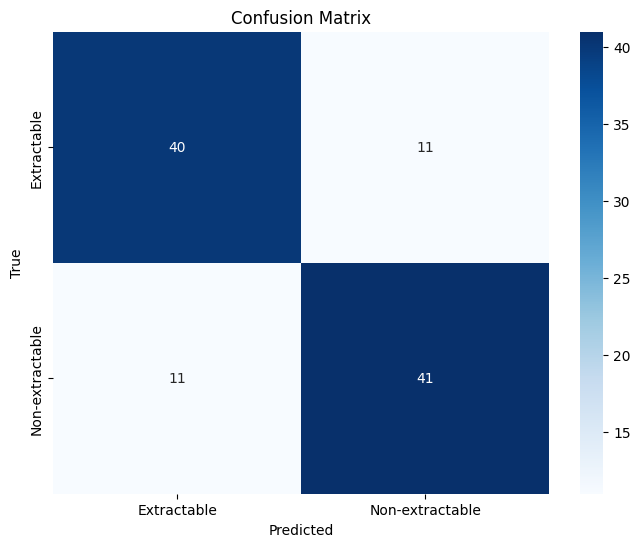

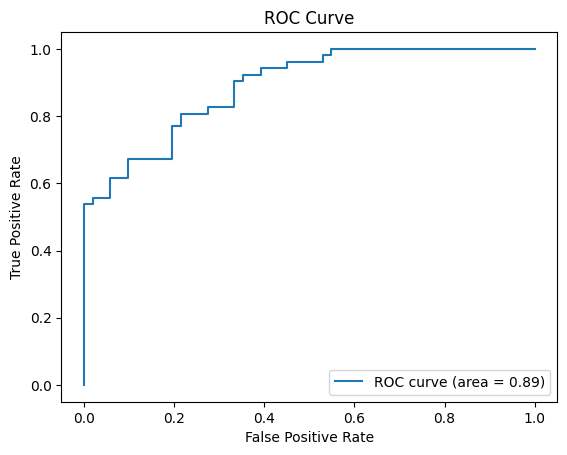

Accuracy: 0.7864077669902912
Precision: 0.7884615384615384
Recall: 0.7884615384615384
F1-Score: 0.7884615384615384
ROC AUC: 0.8887631975867271


In [ ]:
!pip install tensorflow
!pip install scikit-learn

import tensorflow as tf
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define paths
train_path = '/content/drive/MyDrive/train'
test_path = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # or 'categorical' if more than two classes
)

# Data rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary', # or 'categorical' if more than two classes
    shuffle=False # Important for ROC curve
)

# Load pre-trained ResNet101V2 model (excluding top classification layer)
base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # or softmax for multi-class

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the base model (optional, but often improves performance)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # or categorical_crossentropy

# Train the model
model.fit(train_generator, epochs=30) # Adjust epochs as needed

# Make predictions on test set
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_prob)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# Inception-resnet v2
## from base paper

Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.6172 - loss: 0.8544 - val_accuracy: 0.7282 - val_loss: 0.5361
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.7051 - loss: 0.5600 - val_accuracy: 0.7573 - val_loss: 0.5644
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7370 - loss: 0.5283 - val_accuracy: 0.7379 - val_loss: 0.5365
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.7639 - loss: 0.4839 - val_accuracy: 0.7184 - val_loss: 0.5585
35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 360ms/step


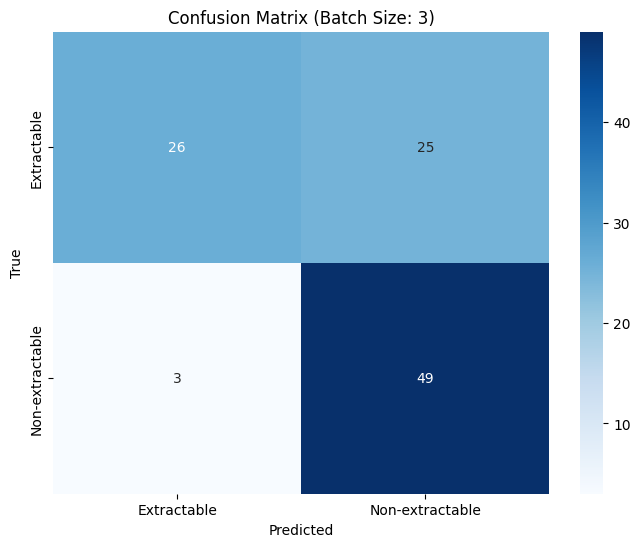

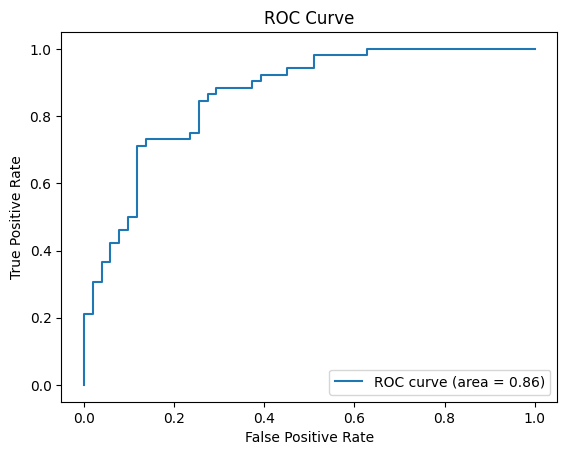

Batch Size: 3
Accuracy: 0.7281553398058253
Precision: 0.6621621621621622
Recall: 0.9423076923076923
F1-Score: 0.7777777777777778
ROC AUC: 0.8631221719457014
Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 55s 134ms/step - accuracy: 0.5668 - loss: 0.9481 - val_accuracy: 0.7961 - val_loss: 0.4976
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.7220 - loss: 0.5297 - val_accuracy: 0.7961 - val_loss: 0.4839
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.7520 - loss: 0.5165 - val_accuracy: 0.8155 - val_loss: 0.4419
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.7505 - loss: 0.4888 - val_accuracy: 0.6796 - val_loss: 0.5732
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7767 - loss: 0.4649 - val_accuracy: 0.7087 - val_loss: 0.5962
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.8041 - loss: 0.4205 - val_accuracy: 0.8155 - val_loss: 0.4031
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.8166 - loss: 0.4045 - val_accuracy: 0.6796 - val_loss: 0.6832
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.7931 - loss: 0.4116 - val_accura

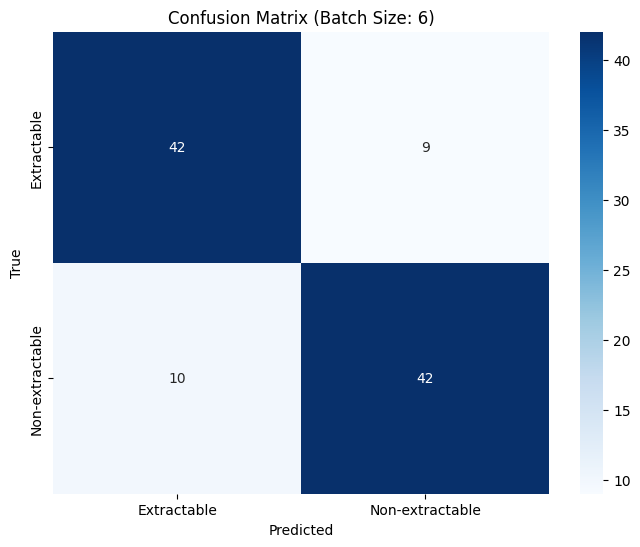

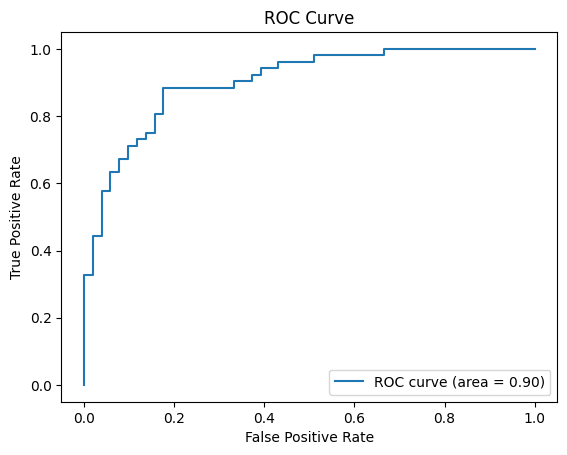

Batch Size: 6
Accuracy: 0.8155339805825242
Precision: 0.8235294117647058
Recall: 0.8076923076923077
F1-Score: 0.8155339805825242
ROC AUC: 0.9027149321266968
Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 80s 300ms/step - accuracy: 0.5391 - loss: 1.2011 - val_accuracy: 0.7573 - val_loss: 0.4965
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.6978 - loss: 0.5682 - val_accuracy: 0.7476 - val_loss: 0.5574
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.7544 - loss: 0.5126 - val_accuracy: 0.7670 - val_loss: 0.4972
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.7570 - loss: 0.4843 - val_accuracy: 0.7961 - val_loss: 0.4435
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.7882 - loss: 0.4459 - val_accuracy: 0.8058 - val_loss: 0.4625
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.8107 - loss: 0.4026 - val_accuracy: 0.8058 - val_loss: 0.4908
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.7959 - loss: 0.4085 - val_accuracy: 0.6214 - val_loss: 0.8114
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


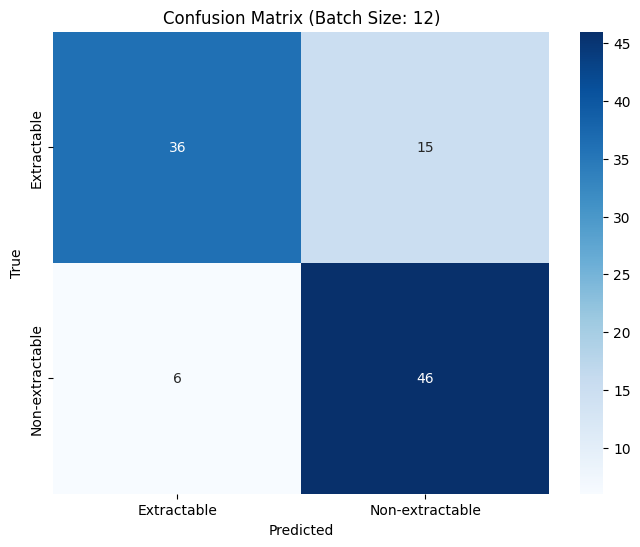

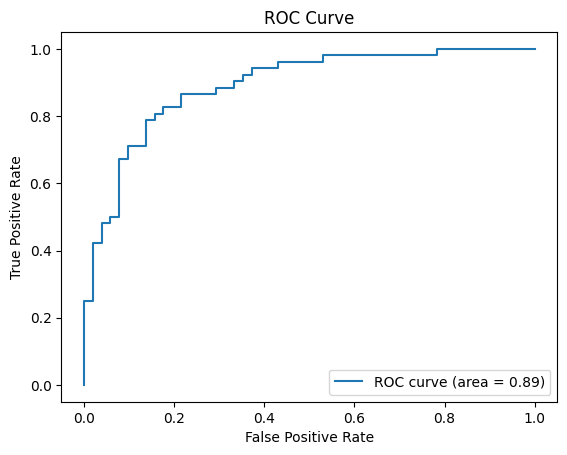

Batch Size: 12
Accuracy: 0.7961165048543689
Precision: 0.7540983606557377
Recall: 0.8846153846153846
F1-Score: 0.8141592920353983
ROC AUC: 0.8910256410256411
Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 410ms/step - accuracy: 0.5715 - loss: 0.9038 - val_accuracy: 0.6019 - val_loss: 0.8116
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.7394 - loss: 0.5377 - val_accuracy: 0.7961 - val_loss: 0.4694
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.7695 - loss: 0.4829 - val_accuracy: 0.7767 - val_loss: 0.4522
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.8013 - loss: 0.4302 - val_accuracy: 0.7961 - val_loss: 0.4639
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.7952 - loss: 0.4280 - val_accuracy: 0.7573 - val_loss: 0.5002
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.8361 - loss: 0.3717 - val_accuracy: 0.6796 - val_loss: 0.6789
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step


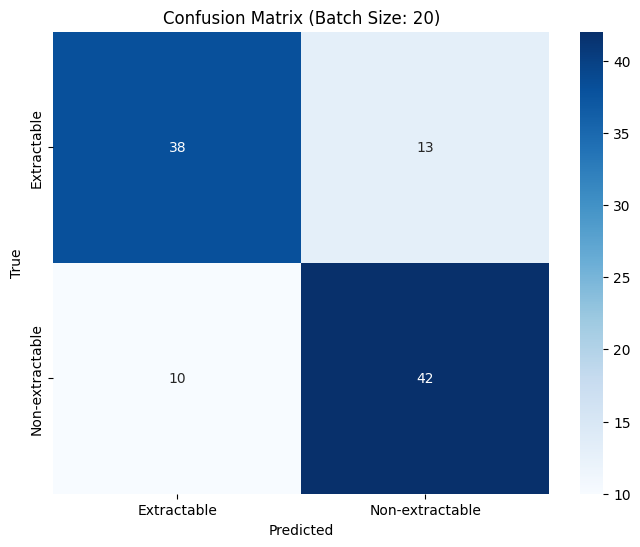

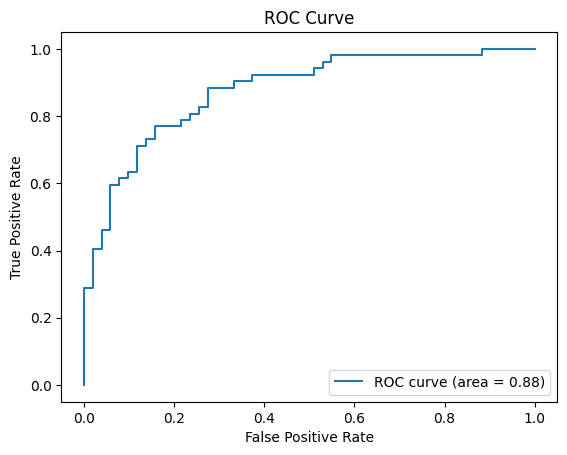

Batch Size: 20
Accuracy: 0.7766990291262136
Precision: 0.7636363636363637
Recall: 0.8076923076923077
F1-Score: 0.7850467289719626
ROC AUC: 0.8759426847662142


In [ ]:
!pip install tensorflow
!pip install scikit-learn

import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

# Define paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224
batch_sizes = [3, 6, 12, 20]

# Create a function to compile and train the model with different batch sizes
def train_model_with_batch_size(batch_size):
    # Data augmentation for training set
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary'  # or 'categorical' if more than two classes
    )

    # Data rescaling for test set
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary', # or 'categorical' if more than two classes
        shuffle=False # Important for ROC curve
    )

    # Load pre-trained InceptionResNetV2 model (excluding top classification layer)
    base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

    # Add custom classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x) # or softmax for multi-class

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze layers of the base model (optional, but often improves performance)
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model with Adam optimizer and binary crossentropy loss
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    model.fit(train_generator, epochs=30, validation_data=test_generator, callbacks=[early_stopping])  # Adjust epochs as needed

    # Make predictions on test set
    y_pred_prob = model.predict(test_generator)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Get true labels
    y_true = test_generator.classes

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Batch Size: {batch_size})')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Print metrics
    print(f"Batch Size: {batch_size}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC AUC: {roc_auc}")

# Test the model with each batch size
for batch_size in batch_sizes:
    train_model_with_batch_size(batch_size)


## our approach

Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 50s 463ms/step - accuracy: 0.5454 - loss: 1.0504
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.7088 - loss: 0.5612
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.7658 - loss: 0.5074
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.7685 - loss: 0.4999
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.7921 - loss: 0.4443
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.7820 - loss: 0.4574
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.8311 - loss: 0.3945
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 0.8421 - loss: 0.3735
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.8081 - loss: 0.4011
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.8504 - loss: 0.3479
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.8431 - loss: 0.3451
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - acc

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step


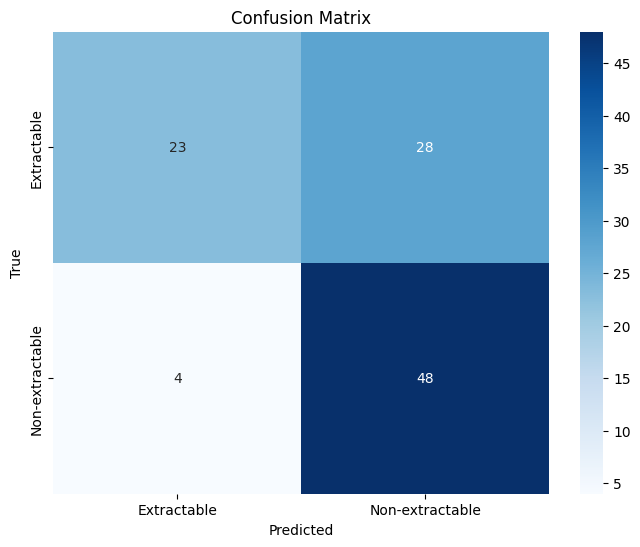

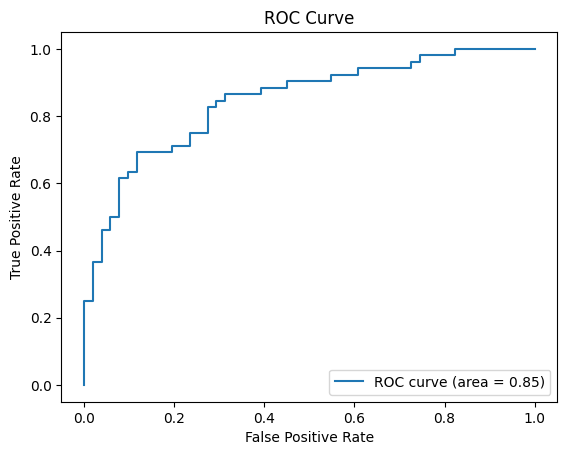

Accuracy: 0.6893203883495146
Precision: 0.631578947368421
Recall: 0.9230769230769231
F1-Score: 0.75
ROC AUC: 0.8457767722473606


In [ ]:
!pip install tensorflow
!pip install scikit-learn

import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # or 'categorical' if more than two classes
)

# Data rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary', # or 'categorical' if more than two classes
    shuffle=False # Important for ROC curve
)

# Load pre-trained InceptionResNetV2 model (excluding top classification layer)
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # or softmax for multi-class

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the base model (optional, but often improves performance)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # or categorical_crossentropy

# Train the model
model.fit(train_generator, epochs=30) # Adjust epochs as needed

# Make predictions on test set
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_prob)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# VGG16

Epoch 1/30, Loss: 0.6891283988952637
Epoch 2/30, Loss: 0.6942522525787354
Epoch 3/30, Loss: 0.6871897578239441
Epoch 4/30, Loss: 0.6810145378112793
Epoch 5/30, Loss: 0.6784557700157166
Epoch 6/30, Loss: 0.6892576217651367
Epoch 7/30, Loss: 0.6926850080490112
Epoch 8/30, Loss: 0.5737740397453308
Epoch 9/30, Loss: 0.6468547582626343
Epoch 10/30, Loss: 0.6730831861495972
Epoch 11/30, Loss: 0.6912739872932434
Epoch 12/30, Loss: 0.7067047953605652
Epoch 13/30, Loss: 0.7492411732673645
Epoch 14/30, Loss: 0.7070743441581726
Epoch 15/30, Loss: 0.7010487914085388
Epoch 16/30, Loss: 0.6671499609947205
Epoch 17/30, Loss: 0.6984506249427795
Epoch 18/30, Loss: 0.7141955494880676
Epoch 19/30, Loss: 0.6904011964797974
Epoch 20/30, Loss: 0.6986321210861206
Epoch 21/30, Loss: 0.6963133811950684
Epoch 22/30, Loss: 0.6885483264923096
Epoch 23/30, Loss: 0.7077101469039917
Epoch 24/30, Loss: 0.6962370276451111
Epoch 25/30, Loss: 0.7039141058921814
Epoch 26/30, Loss: 0.6789541244506836
Epoch 27/30, Loss: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


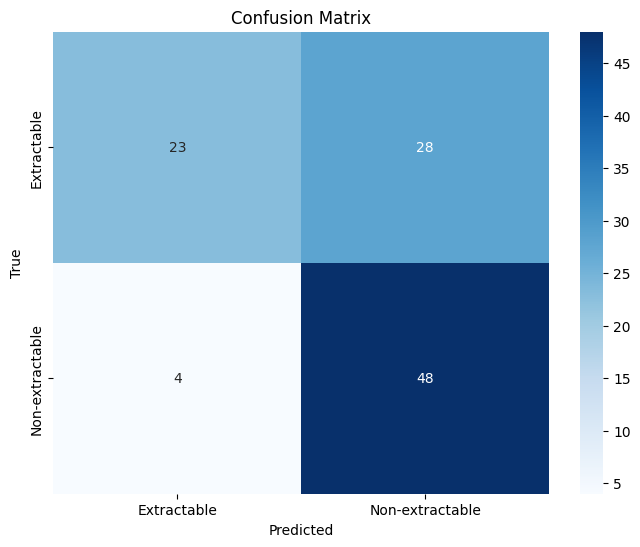

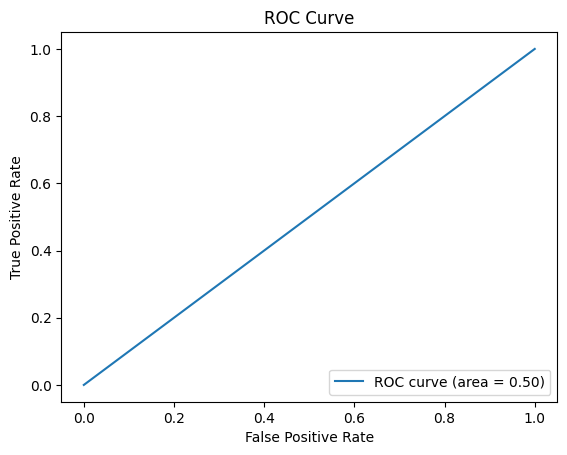

Accuracy: 0.49514563106796117
Precision: 0.2451691959656895
Recall: 0.49514563106796117
F1-Score: 0.32795359979826
ROC AUC: 0.5


In [ ]:
!pip install torch
!pip install torchvision
!pip install scikit-learn

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'

# Data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_path, transform=data_transform)
test_dataset = datasets.ImageFolder(test_path, transform=data_transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load VGG16 model
model = models.vgg16(pretrained=True)

# Modify the classifier to match the number of classes in your dataset
num_classes = len(train_dataset.classes)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

# Move model to the right device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 30  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Testing loop
model.eval()
all_preds = []
all_labels = []
all_pred_probs = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_pred_probs.extend(torch.nn.functional.softmax(outputs, dim=1)[:, 1].cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
roc_auc = roc_auc_score(all_labels, all_pred_probs)
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_pred_probs)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# resnet with attention

Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.6872 - loss: 0.7211 - val_accuracy: 0.7864 - val_loss: 0.4363
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.8666 - loss: 0.3188 - val_accuracy: 0.8155 - val_loss: 0.5802
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9559 - loss: 0.1300 - val_accuracy: 0.7476 - val_loss: 0.9028
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9909 - loss: 0.0321 - val_accuracy: 0.7767 - val_loss: 0.9676
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step


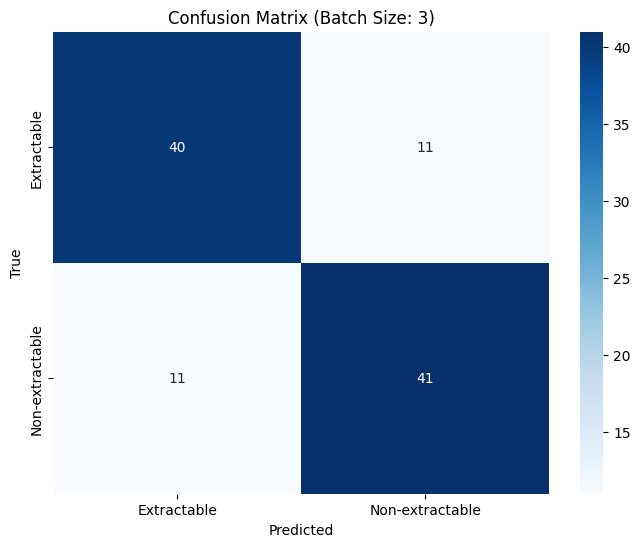

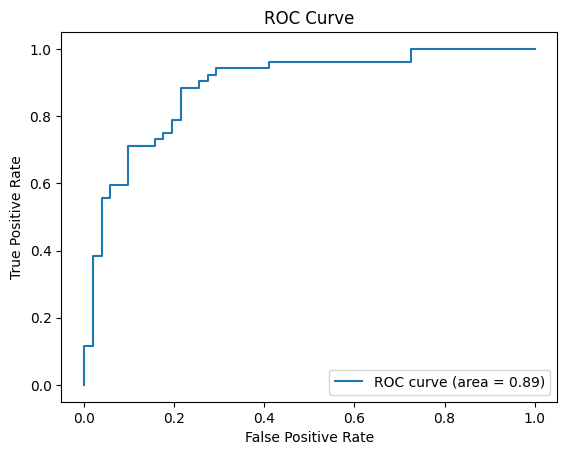

Batch Size: 3
Accuracy: 0.7864077669902912
Precision: 0.7884615384615384
Recall: 0.7884615384615384
F1-Score: 0.7884615384615384
ROC AUC: 0.8880090497737557
Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - accuracy: 0.6833 - loss: 0.6517 - val_accuracy: 0.7379 - val_loss: 0.6235
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.8903 - loss: 0.2840 - val_accuracy: 0.7767 - val_loss: 0.4683
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.9789 - loss: 0.0904 - val_accuracy: 0.7864 - val_loss: 0.8902
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9813 - loss: 0.0473 - val_accuracy: 0.7767 - val_loss: 1.2929
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 0.8252 - val_loss: 0.7805
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 316ms/step


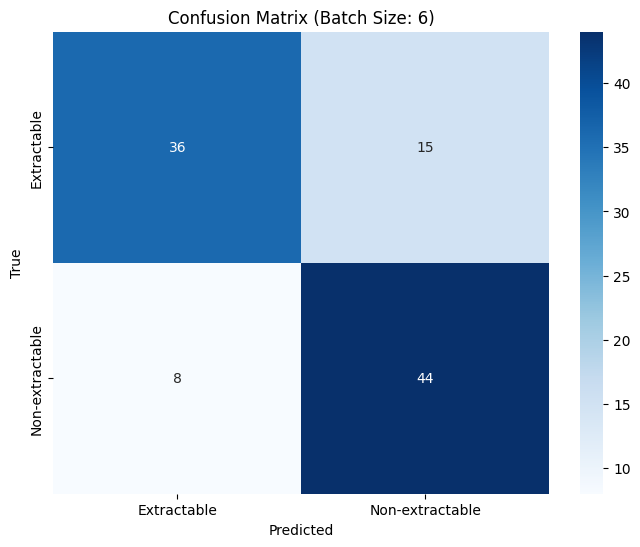

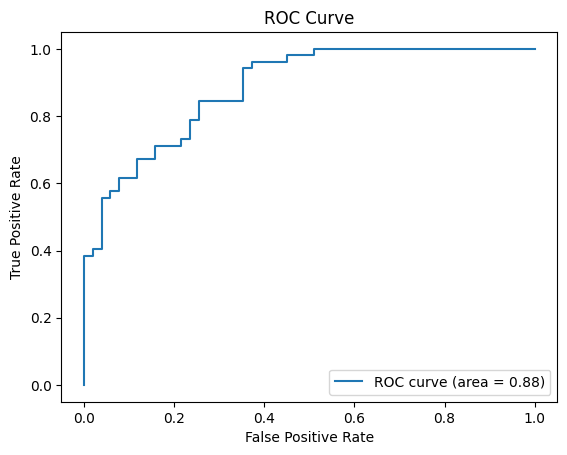

Batch Size: 6
Accuracy: 0.7766990291262136
Precision: 0.7457627118644068
Recall: 0.8461538461538461
F1-Score: 0.7927927927927928
ROC AUC: 0.8846153846153846
Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 228ms/step - accuracy: 0.6518 - loss: 0.6607 - val_accuracy: 0.7864 - val_loss: 0.4445
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.8867 - loss: 0.2810 - val_accuracy: 0.8252 - val_loss: 0.5153
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9615 - loss: 0.1078 - val_accuracy: 0.7670 - val_loss: 0.7871
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9976 - loss: 0.0193 - val_accuracy: 0.8252 - val_loss: 0.9053
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 885ms/step


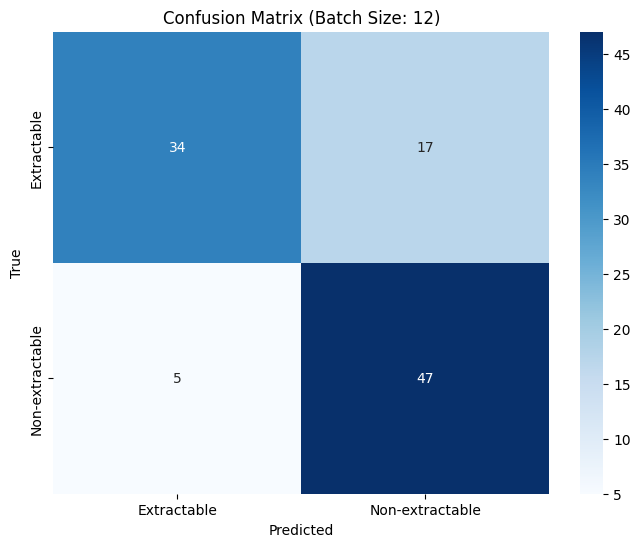

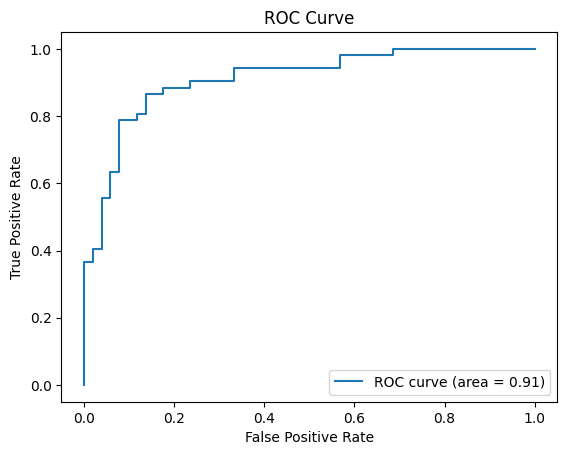

Batch Size: 12
Accuracy: 0.7864077669902912
Precision: 0.734375
Recall: 0.9038461538461539
F1-Score: 0.8103448275862069
ROC AUC: 0.9106334841628959
Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 42s 362ms/step - accuracy: 0.6126 - loss: 0.7376 - val_accuracy: 0.8350 - val_loss: 0.4953
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.8708 - loss: 0.3238 - val_accuracy: 0.7379 - val_loss: 0.6392
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.9747 - loss: 0.1073 - val_accuracy: 0.8155 - val_loss: 0.5229
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.9991 - loss: 0.0225 - val_accuracy: 0.8350 - val_loss: 0.7658
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


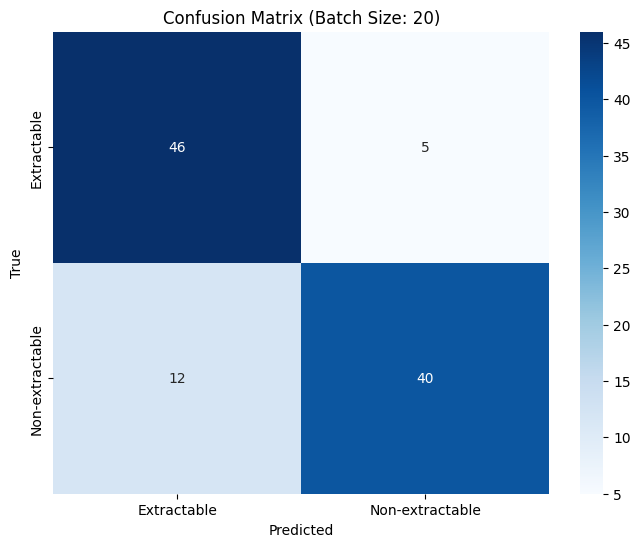

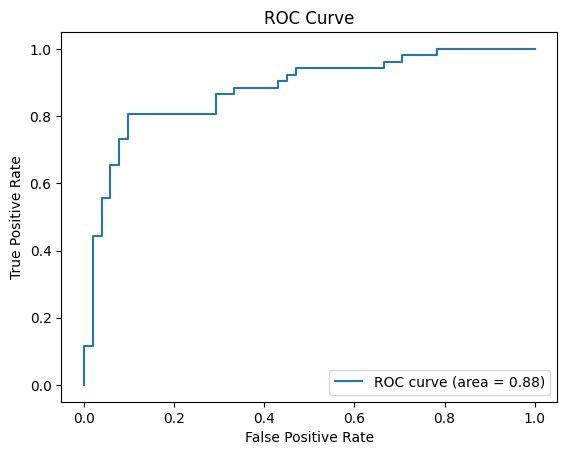

Batch Size: 20
Accuracy: 0.8349514563106796
Precision: 0.8888888888888888
Recall: 0.7692307692307693
F1-Score: 0.8247422680412371
ROC AUC: 0.8789592760180996


In [ ]:
!pip install tensorflow
!pip install scikit-learn

import tensorflow as tf
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224
batch_sizes = [3, 6, 12, 20]

# Attention Block function
def attention_block(inputs):
    attention = Dense(inputs.shape[-1], activation='sigmoid')(inputs)
    return Multiply()([inputs, attention])

# Function to compile and train the model with different batch sizes
def train_model_with_batch_size(batch_size):
    # Data augmentation for training set
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary'  # or 'categorical' if more than two classes
    )

    # Data rescaling for test set
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary',  # or 'categorical' if more than two classes
        shuffle=False  # Important for ROC curve
    )

    # Load pre-trained ResNet101V2 model (excluding top classification layer)
    base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

    # Define model inputs
    inputs = Input(shape=(img_width, img_height, 3))

    # Extract features from the base model
    x = base_model(inputs, training=False)

    # Apply attention mechanism
    x = attention_block(x)

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Fully connected layers
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Build the final model
    model = Model(inputs=inputs, outputs=predictions)

    # Freeze layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(train_generator, epochs=30, validation_data=test_generator, callbacks=[early_stopping])

    # Make predictions on test set
    y_pred_prob = model.predict(test_generator)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Get true labels
    y_true = test_generator.classes

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Batch Size: {batch_size})')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Print metrics
    print(f"Batch Size: {batch_size}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC AUC: {roc_auc}")

# Test the model with each batch size
for batch_size in batch_sizes:
    train_model_with_batch_size(batch_size)


## our approach

Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 374s 7s/step - accuracy: 0.6309 - loss: 0.6791
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 28s 164ms/step - accuracy: 0.8790 - loss: 0.3175
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.9421 - loss: 0.1629
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.9993 - loss: 0.0423
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 1.0000 - loss: 0.0147
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 1.0000 - loss: 0.0037
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 1.0000 - loss: 0.0022
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 1.0000 - loss: 0.0013
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 1.0000 - loss: 8.6863e-04
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 1.0000 - loss: 6.7759e-04
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 1.0000 - loss: 4.7937e-04
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 199m

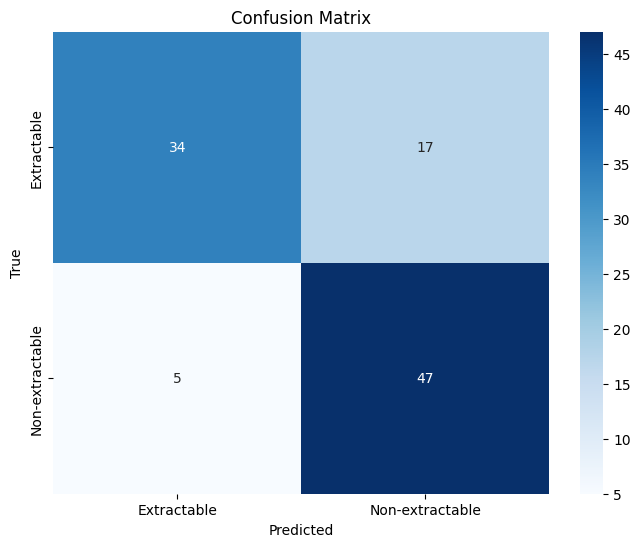

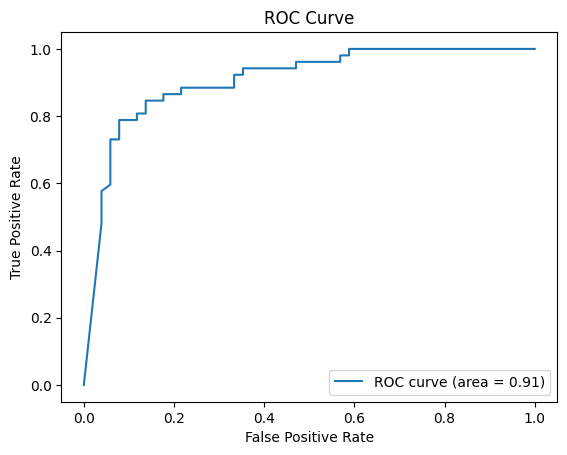

Accuracy: 0.7864077669902912
Precision: 0.734375
Recall: 0.9038461538461539
F1-Score: 0.8103448275862069
ROC AUC: 0.9074283559577677


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Multiply, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Data rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Load pre-trained ResNet101V2 model (excluding top classification layer)
base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add attention mechanism
def attention_block(inputs):
    attention = Dense(inputs.shape[-1], activation='sigmoid')(inputs)
    return Multiply()([inputs, attention])

# Add custom classification layers with attention
inputs = Input(shape=(img_width, img_height, 3))
x = base_model(inputs, training=False)
x = attention_block(x)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=inputs, outputs=predictions)

# Freeze layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=30)

# Make predictions on test set
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_prob)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# resnet with mobilenet
## base paper approach

Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 68s 71ms/step - accuracy: 0.6144 - loss: 0.8432 - val_accuracy: 0.6214 - val_loss: 0.6761
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.7998 - loss: 0.4287 - val_accuracy: 0.7767 - val_loss: 0.4056
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.8868 - loss: 0.2679 - val_accuracy: 0.8350 - val_loss: 0.3888
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9128 - loss: 0.2353 - val_accuracy: 0.8252 - val_loss: 0.4749
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9367 - loss: 0.1808 - val_accuracy: 0.8641 - val_loss: 0.3225
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9606 - loss: 0.1160 - val_accuracy: 0.8835 - val_loss: 0.4892
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9717 - loss: 0.0814 - val_accuracy: 0.8155 - val_loss: 0.5259
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9616 - loss: 0.1070 - val_accurac

35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 327ms/step


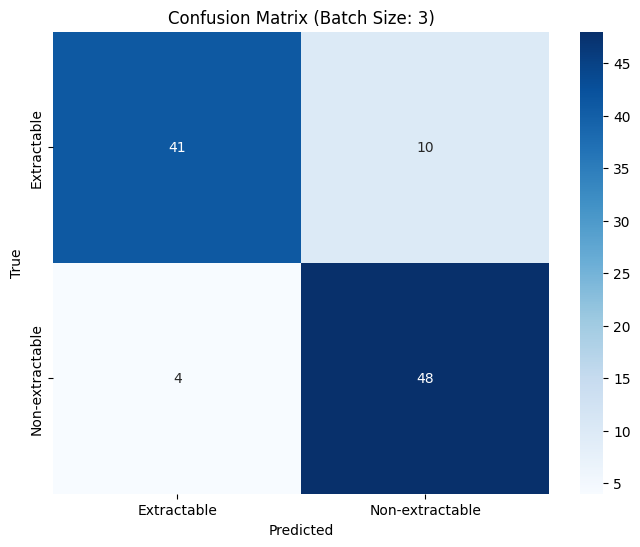

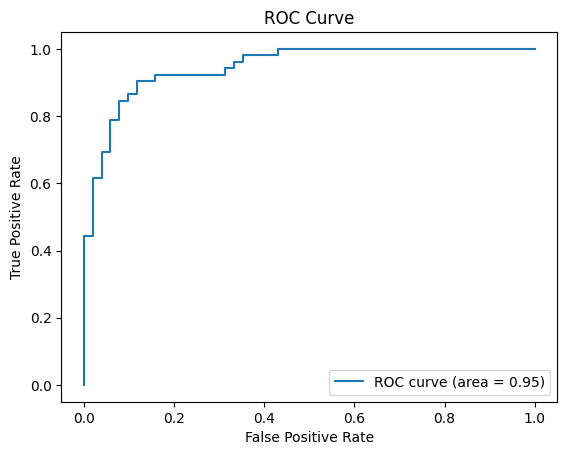

Batch Size: 3
Accuracy: 0.8640776699029126
Precision: 0.8275862068965517
Recall: 0.9230769230769231
F1-Score: 0.8727272727272727
ROC AUC: 0.9464555052790347
Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 50s 120ms/step - accuracy: 0.6395 - loss: 0.8942 - val_accuracy: 0.8544 - val_loss: 0.3722
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.8367 - loss: 0.3769 - val_accuracy: 0.8544 - val_loss: 0.3592
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9056 - loss: 0.2522 - val_accuracy: 0.8641 - val_loss: 0.3271
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.9214 - loss: 0.2103 - val_accuracy: 0.8252 - val_loss: 0.4128
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9353 - loss: 0.1697 - val_accuracy: 0.8350 - val_loss: 0.4037
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9379 - loss: 0.1523 - val_accuracy: 0.7864 - val_loss: 0.6864
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 508ms/step


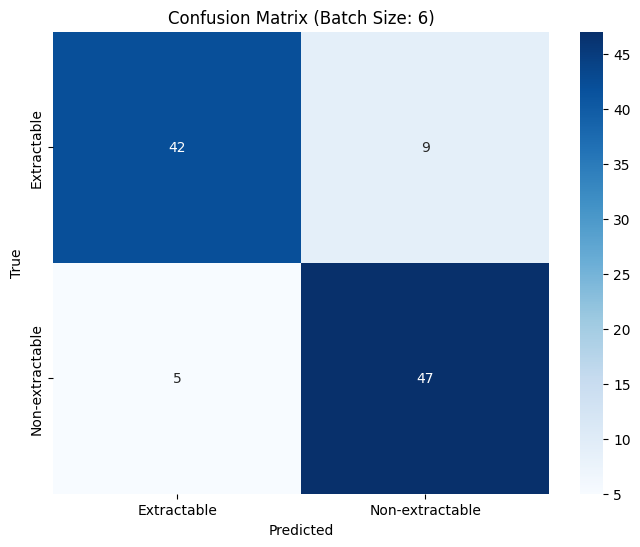

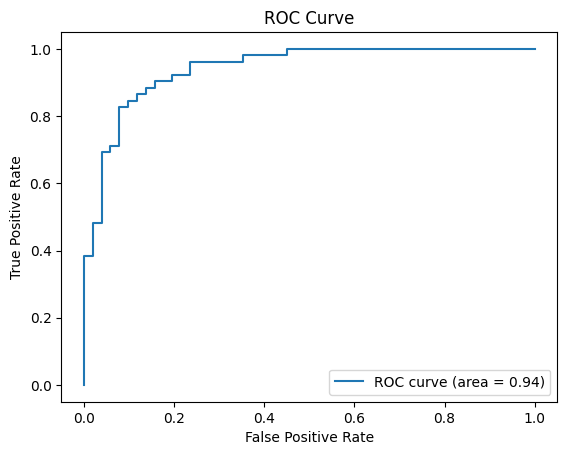

Batch Size: 6
Accuracy: 0.8640776699029126
Precision: 0.8392857142857143
Recall: 0.9038461538461539
F1-Score: 0.8703703703703703
ROC AUC: 0.9415535444947211
Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 341ms/step - accuracy: 0.6080 - loss: 0.8227 - val_accuracy: 0.7670 - val_loss: 0.4480
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 89ms/step - accuracy: 0.8032 - loss: 0.3955 - val_accuracy: 0.8835 - val_loss: 0.3461
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.8972 - loss: 0.2650 - val_accuracy: 0.8447 - val_loss: 0.3727
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9406 - loss: 0.1616 - val_accuracy: 0.8641 - val_loss: 0.4436
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.9624 - loss: 0.1121 - val_accuracy: 0.7864 - val_loss: 0.6978
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step


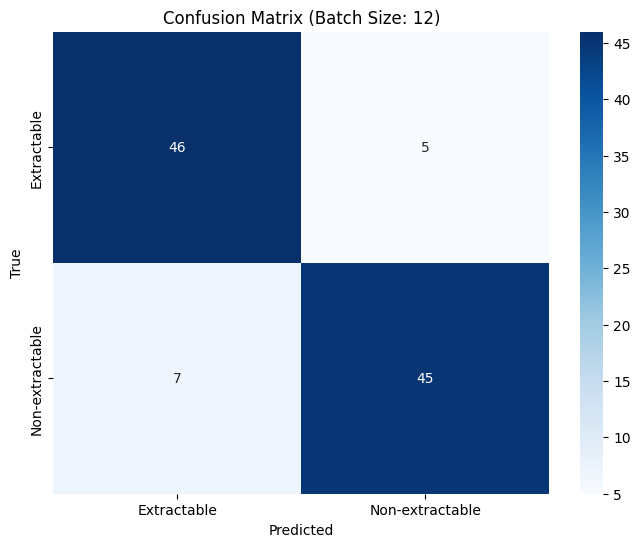

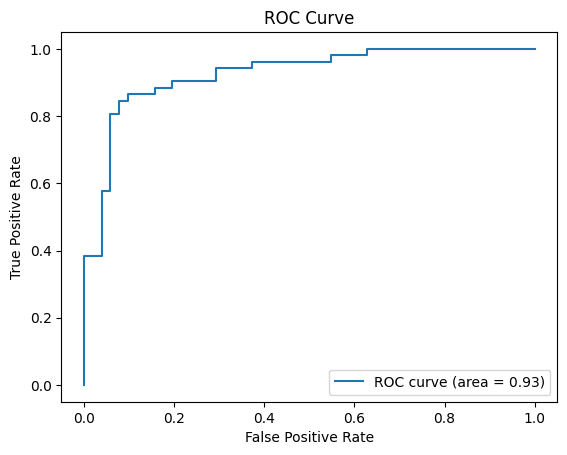

Batch Size: 12
Accuracy: 0.883495145631068
Precision: 0.9
Recall: 0.8653846153846154
F1-Score: 0.8823529411764706
ROC AUC: 0.9260935143288085
Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 382ms/step - accuracy: 0.6097 - loss: 0.8342 - val_accuracy: 0.8447 - val_loss: 0.3278
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.8216 - loss: 0.4128 - val_accuracy: 0.8058 - val_loss: 0.4227
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.9257 - loss: 0.2084 - val_accuracy: 0.8641 - val_loss: 0.3243
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.9140 - loss: 0.2110 - val_accuracy: 0.8447 - val_loss: 0.5057
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.9343 - loss: 0.1624 - val_accuracy: 0.8350 - val_loss: 0.3554
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.9398 - loss: 0.1501 - val_accuracy: 0.7767 - val_loss: 0.8346
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step


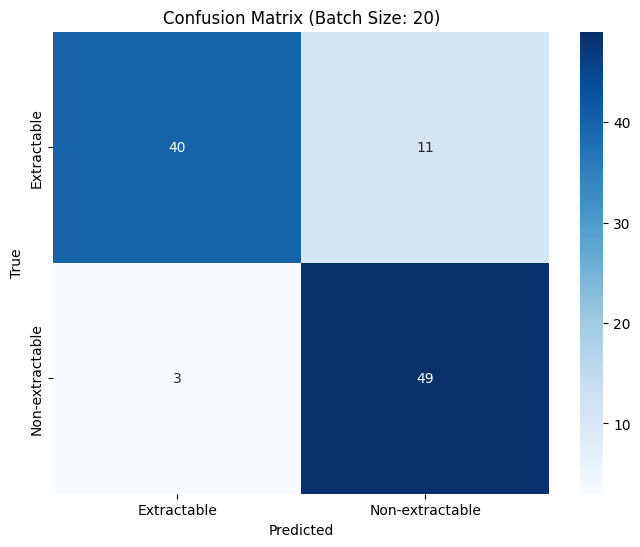

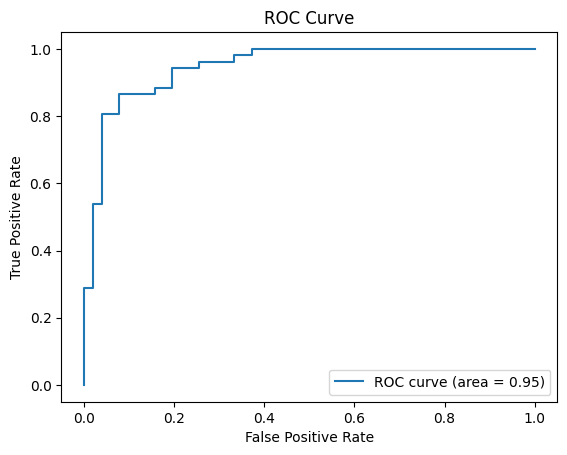

Batch Size: 20
Accuracy: 0.8640776699029126
Precision: 0.8166666666666667
Recall: 0.9423076923076923
F1-Score: 0.875
ROC AUC: 0.947209653092006


In [ ]:
!pip install tensorflow
!pip install scikit-learn

import tensorflow as tf
from tensorflow.keras.applications import ResNet101V2, MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224
batch_sizes = [3, 6, 12, 20]

# Function to compile and train the model with different batch sizes
def train_model_with_batch_size(batch_size):
    # Data augmentation for training set
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary'  # or 'categorical' if more than two classes
    )

    # Data rescaling for test set
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary',  # or 'categorical' if more than two classes
        shuffle=False  # Important for ROC curve
    )

    # Load pre-trained ResNet101V2 model (excluding top classification layer)
    resnet_base = ResNet101V2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

    # Load pre-trained MobileNetV2 model (excluding top classification layer)
    mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

    # Define model inputs
    inputs = Input(shape=(img_width, img_height, 3))

    # Extract features from both models
    resnet_features = resnet_base(inputs)
    mobilenet_features = mobilenet_base(inputs)

    # Apply global average pooling to both sets of features
    resnet_features = GlobalAveragePooling2D()(resnet_features)
    mobilenet_features = GlobalAveragePooling2D()(mobilenet_features)

    # Concatenate features
    combined_features = Concatenate()([resnet_features, mobilenet_features])

    # Add fully connected layers
    x = Dense(512, activation='relu')(combined_features)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)

    # Build the model
    hybrid_model = Model(inputs=inputs, outputs=outputs)

    # Freeze layers of the base models
    for layer in resnet_base.layers:
        layer.trainable = False

    for layer in mobilenet_base.layers:
        layer.trainable = False

    # Compile the model with Adam optimizer and binary crossentropy loss
    hybrid_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = hybrid_model.fit(train_generator, epochs=30, validation_data=test_generator, callbacks=[early_stopping])

    # Make predictions on test set
    y_pred_prob = hybrid_model.predict(test_generator)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Get true labels
    y_true = test_generator.classes

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Batch Size: {batch_size})')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Print metrics
    print(f"Batch Size: {batch_size}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC AUC: {roc_auc}")

# Test the model with each batch size
for batch_size in batch_sizes:
    train_model_with_batch_size(batch_size)


## our approach

Found 1200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 377ms/step - accuracy: 0.5495 - loss: 1.0111
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 164ms/step - accuracy: 0.8045 - loss: 0.4411
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step - accuracy: 0.8251 - loss: 0.3777
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.9248 - loss: 0.2134
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.9417 - loss: 0.1622
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.9713 - loss: 0.0956
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - accuracy: 0.9623 - loss: 0.0881
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - accuracy: 0.9825 - loss: 0.0525
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.9522 - loss: 0.1088
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.9906 - loss: 0.0347
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 1.0000 - loss: 0.0092
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - accu

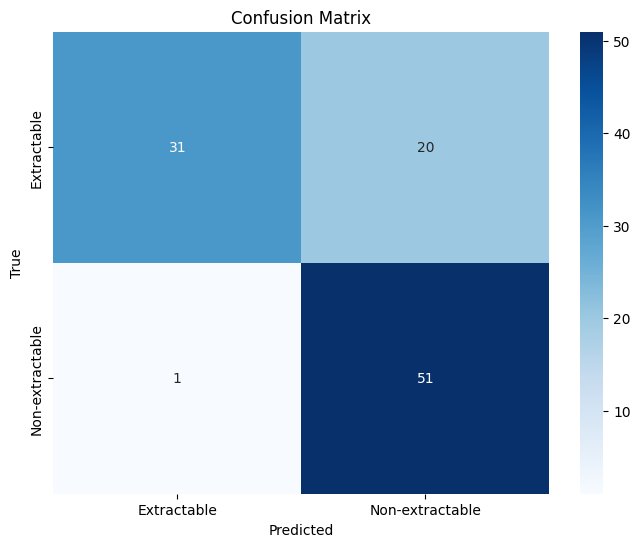

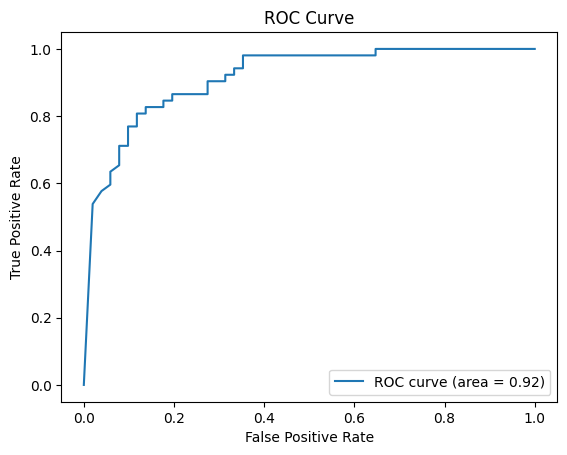

Accuracy: 0.7961165048543689
Precision: 0.7183098591549296
Recall: 0.9807692307692307
F1-Score: 0.8292682926829268
ROC AUC: 0.9155354449472096


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet101V2, MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
train_path = '/content/drive/MyDrive/augmented_cropless'
test_path = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # or 'categorical' if more than two classes
)

# Data rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary', # or 'categorical' if more than two classes
    shuffle=False # Important for ROC curve
)

# Load pre-trained ResNet101V2 model (excluding top classification layer)
resnet_base = ResNet101V2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Load pre-trained MobileNetV2 model (excluding top classification layer)
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Define model inputs
inputs = Input(shape=(img_width, img_height, 3))

# Extract features from both models
resnet_features = resnet_base(inputs)
mobilenet_features = mobilenet_base(inputs)

# Apply global average pooling to both sets of features
resnet_features = GlobalAveragePooling2D()(resnet_features)
mobilenet_features = GlobalAveragePooling2D()(mobilenet_features)

# Concatenate features
combined_features = Concatenate()([resnet_features, mobilenet_features])

# Add fully connected layers
x = Dense(512, activation='relu')(combined_features)
x = Dense(256, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

# Build the model
hybrid_model = Model(inputs=inputs, outputs=outputs)

# Freeze layers of the base models
for layer in resnet_base.layers:
    layer.trainable = False

for layer in mobilenet_base.layers:
    layer.trainable = False

# Compile the model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = hybrid_model.fit(train_generator, epochs=30)

# Make predictions on test set
y_pred_prob = hybrid_model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_prob)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


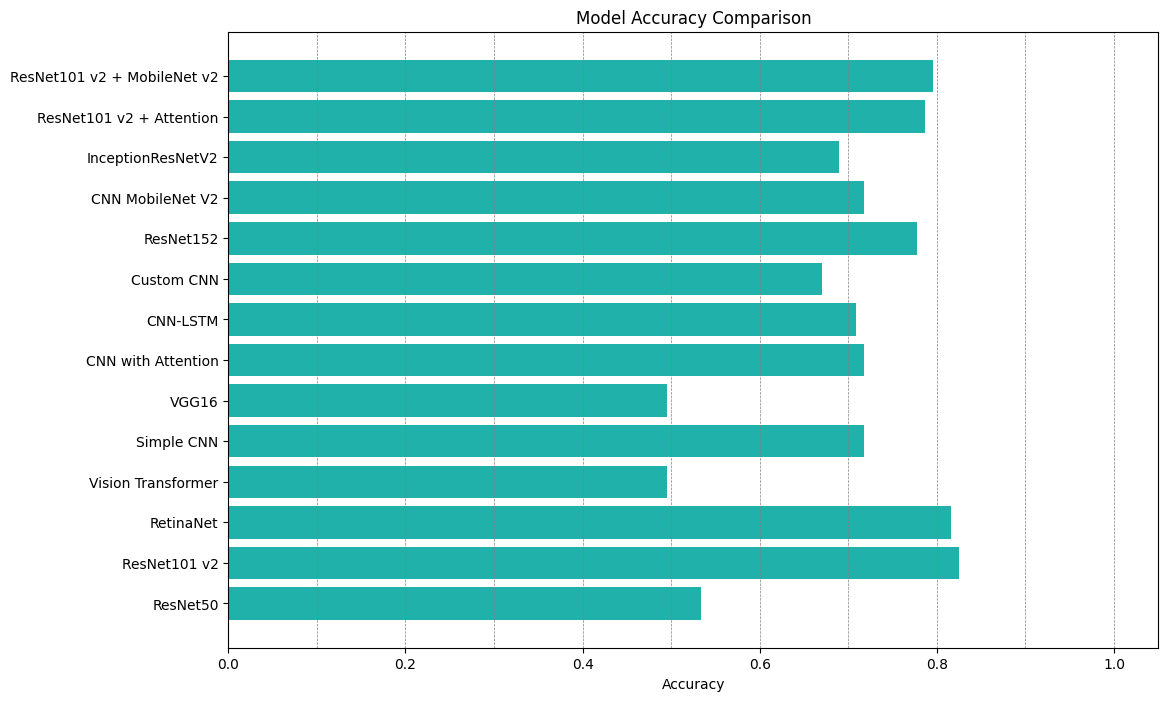

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = ['ResNet50', 'ResNet101 v2', 'RetinaNet', 'Vision Transformer', 'Simple CNN', 'VGG16',
          'CNN with Attention', 'CNN-LSTM', 'Custom CNN', 'ResNet152', 'CNN MobileNet V2', 'InceptionResNetV2',
          'ResNet101 v2 + Attention', 'ResNet101 v2 + MobileNet v2']
accuracy = [0.534, 0.825, 0.816, 0.495, 0.718, 0.495, 0.718, 0.709, 0.670, 0.777, 0.718, 0.689, 0.786, 0.796]

plt.figure(figsize=(12, 8))
plt.barh(models, accuracy, color='lightseagreen')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Add dotted lines for every 0.1 increment in accuracy
for i in np.arange(0.1, 1.1, 0.1):
    plt.axvline(x=i, color='gray', linestyle='--', linewidth=0.5)

plt.show()


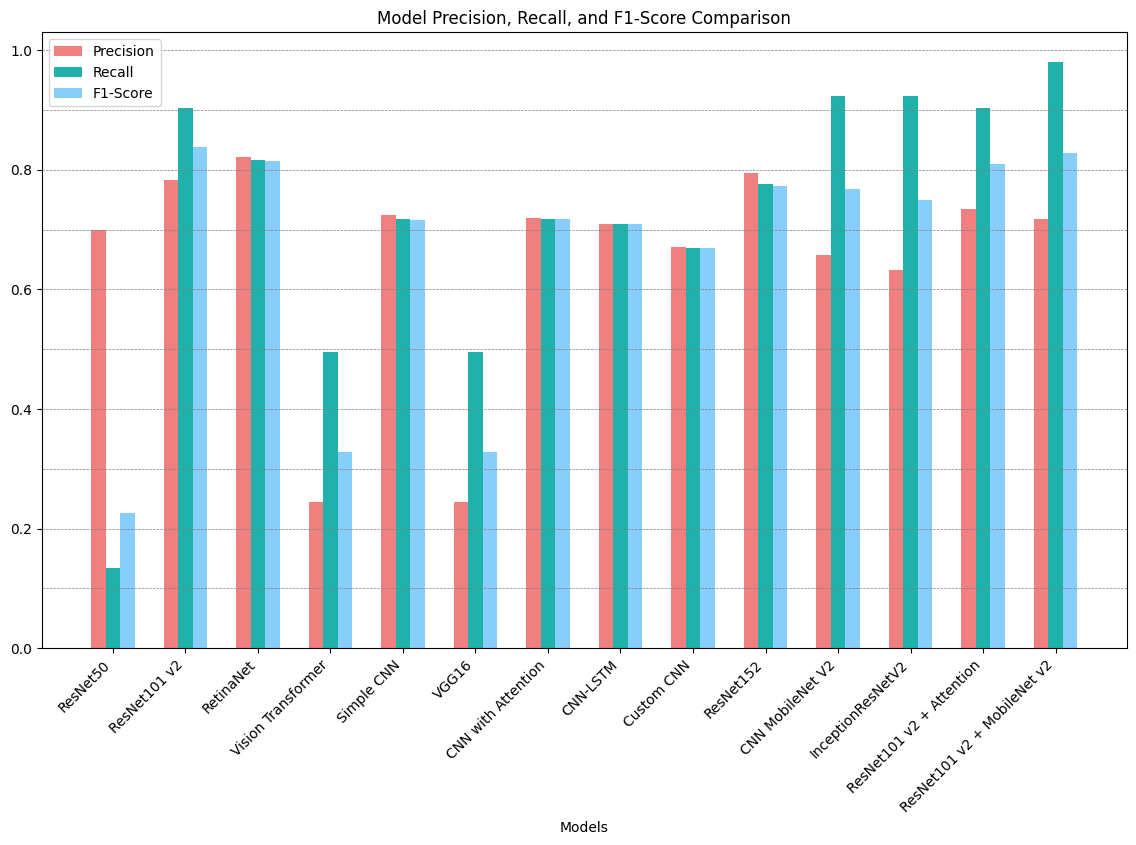

In [ ]:
import numpy as np

precision = [0.700, 0.783, 0.821, 0.245, 0.725, 0.245, 0.720, 0.709, 0.671, 0.795, 0.658, 0.632, 0.734, 0.718]
recall = [0.135, 0.904, 0.816, 0.495, 0.718, 0.495, 0.718, 0.709, 0.670, 0.777, 0.923, 0.923, 0.904, 0.981]
f1_score = [0.226, 0.839, 0.815, 0.328, 0.716, 0.328, 0.718, 0.709, 0.669, 0.773, 0.768, 0.750, 0.810, 0.829]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(x - width, precision, width, label='Precision', color='lightcoral')
ax.bar(x, recall, width, label='Recall', color='lightseagreen')
ax.bar(x + width, f1_score, width, label='F1-Score', color='lightskyblue')

ax.set_xlabel('Models')
ax.set_title('Model Precision, Recall, and F1-Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Add dotted lines for every 0.1 increment in y-axis
for i in np.arange(0.1, 1.1, 0.1):
    ax.axhline(y=i, color='gray', linestyle='--', linewidth=0.5)

plt.show()


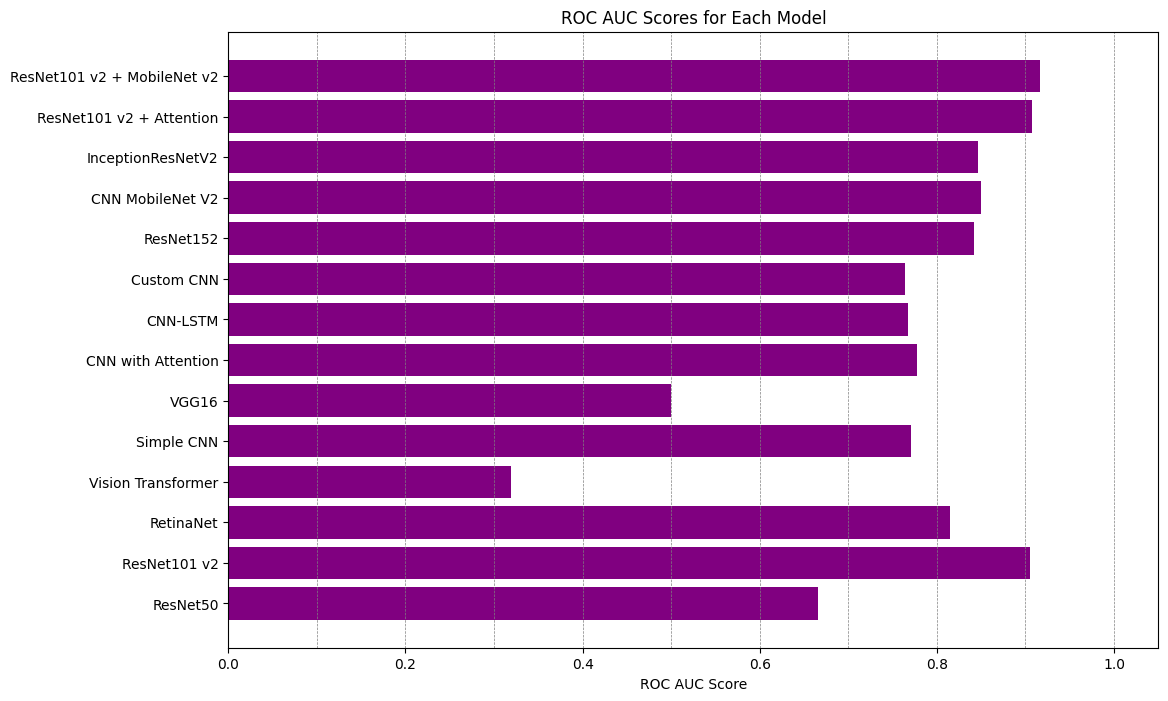

In [ ]:
roc_aucs = [0.666, 0.905, 0.815, 0.319, 0.771, 0.500, 0.777, 0.767, 0.764, 0.842, 0.850, 0.846, 0.907, 0.916]

plt.figure(figsize=(12, 8))
plt.barh(models, roc_aucs, color='purple')
plt.xlabel('ROC AUC Score')
plt.title('ROC AUC Scores for Each Model')

# Add dotted lines for every 0.1 increment in ROC AUC
for i in np.arange(0.1, 1.1, 0.1):
    plt.axvline(x=i, color='gray', linestyle='--', linewidth=0.5)

plt.show()
